In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [2]:
# Import pandas libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("Data/activemq_result.csv", delimiter=',')

# Explore the dataset
print(data.head()) 

# import pandas as pd
# import glob

# # Path to the directory containing your CSV files
# file_path = "Data/*.csv"  # Use a wildcard to match all CSV files in the directory

# # Get all file paths matching the pattern
# all_files = glob.glob(file_path)

# # Read and concatenate all files
# data_list = [pd.read_csv(file, delimiter=',') for file in all_files]
# data = pd.concat(data_list, ignore_index=True)

# print(f"Loaded {len(all_files)} files.")
# print(data.head())  # Display first few rows of the combined dataset


                                         Method name  C20  C3  C4  C1  C5  C6  \
0  org.apache.activemq.transport.amqp.AmqpFramePa...    4  10   1   9   2   5   
1  org.apache.activemq.transport.amqp.AmqpHeader....    5   6   0   6   1   3   
2  org.apache.activemq.transport.amqp.AmqpHeader....    1  13   0  13   3   9   
3  org.apache.activemq.transport.amqp.AmqpInactiv...    1   5   0   5   1   3   
4  org.apache.activemq.transport.amqp.AmqpInactiv...    6   9   0   9   1   5   

   C2  C21  C18  ...  H4  H1  H2  H3       H12       H13       H14   H15  H5  \
0   0    2    4  ...   1   2   2   4  0.200000  0.200000  1.000000   4.0   1   
1   0    5    2  ...   1   1   3   4  0.333333  1.000000  0.333333   4.0   1   
2   0    9    3  ...   1  10   0  10  0.769231  0.000000  0.000000  10.0   1   
3   0    3    1  ...   1   2   0   2  0.400000  0.000000  0.000000   2.0   1   
4   0    4    3  ...   1   3   2   5  0.333333  0.222222  1.500000   5.0   1   

       bug-prone  
0  not bug-pr

In [2]:
import pandas as pd
import glob

# Path to the directory containing your CSV files
file_path = "Data/*.csv"  # Use a wildcard to match all CSV files in the directory

# Get all file paths matching the pattern
all_files = glob.glob(file_path)

# Initialize an empty list to store DataFrames
data_list = []

# Read and combine files
for i, file in enumerate(all_files):
    if i == 0:
        # Include header only for the first file
        df = pd.read_csv(file, delimiter=',')
        print(df.shape)
    else:
        # Skip the header row for subsequent files
        df = pd.read_csv(file, delimiter=',', header=0)
        print(df.shape)
    data_list.append(df)

# Concatenate all DataFrames
combined_data = pd.concat(data_list, ignore_index=True)

# print(f"Loaded {len(all_files)} files.")
# print(combined_data.head())  # Display first few rows of the combined dataset


(4016, 42)
(619, 42)
(965, 42)
(12081, 42)
(1883, 42)
(6415, 42)
(2187, 42)
(2438, 42)
(473, 42)
(1873, 42)
(2238, 42)
(908, 42)
(1167, 42)
(629, 42)
(3936, 42)
(839, 42)
(2265, 42)
(710, 42)


In [3]:
# for file in all_files:
#     dfs = pd.read_csv(file, delimiter=',')
#     if 'Number of Modified Parameters Prefix' in dfs.columns:
#         print(f"File {file} contains the 'Number of Modified Parameters Prefix' column.")

# for file in all_files:
#     dfs = pd.read_csv(file, delimiter=',')
#     print(f"File {file} : ")
#     print(f"columns : {dfs.columns}")

data = combined_data.copy()

print(data.shape)

(45642, 42)


In [4]:
# Check missing value
data.isna().sum() # get missing value count of each column

# check missing values
data.isnull().values.any() # no missing values


import numpy as np

data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check missing value
data.isna().sum() # get missing value count of each column


Method name    0
C20            0
C3             0
C4             0
C1             0
C5             0
C6             0
C2             0
C21            0
C18            0
C8             0
C9             0
C10            0
C17            0
C19            0
C7             0
C11            0
C12            0
C13            0
C14            0
C15            0
C16            0
H6             0
H7             0
H8             0
H9             0
H10            0
H11            0
H16            0
H17            0
H18            0
H19            0
H4             0
H1             0
H2             0
H3             0
H12            0
H13            0
H14            0
H15            0
H5             0
bug-prone      0
dtype: int64

In [5]:
import numpy as np
import pandas as pd

# Calculate percentiles
c1_50 = np.percentile(data['C1'], 50)

# Subset 1: small: C1 < 50th percentile
data_s = data[data['C1'] < c1_50]

# Subset 2: large: C1 >= 50th percentile
data_l = data[data['C1'] >= c1_50]


In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

def plot_all_distributions(df):
    # Number of columns in the dataframe
    num_features = df.shape[1]
    
    
    # Create a figure with subplots
    fig, axes = plt.subplots(8, 5, figsize=(15, 24))
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each feature
    for i, column in enumerate(df.columns):
        sns.histplot(df[column], kde=True, stat="density", bins=30, color='blue', alpha=0.6, ax=axes[i])
        sns.kdeplot(df[column], color='red', linewidth=2, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    
    # Hide any unused subplots
    for i in range(len(df.columns), len(axes)):
        axes[i].axis('off')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Select numerical columns only
df_s = data_s.select_dtypes(include=['number']).apply(pd.to_numeric, downcast='float')
df_l = data_l.select_dtypes(include=['number']).apply(pd.to_numeric, downcast='float')



In [7]:
print(len(df_s))
# 1881

print(len(df_l))
# 2135

21851
23791


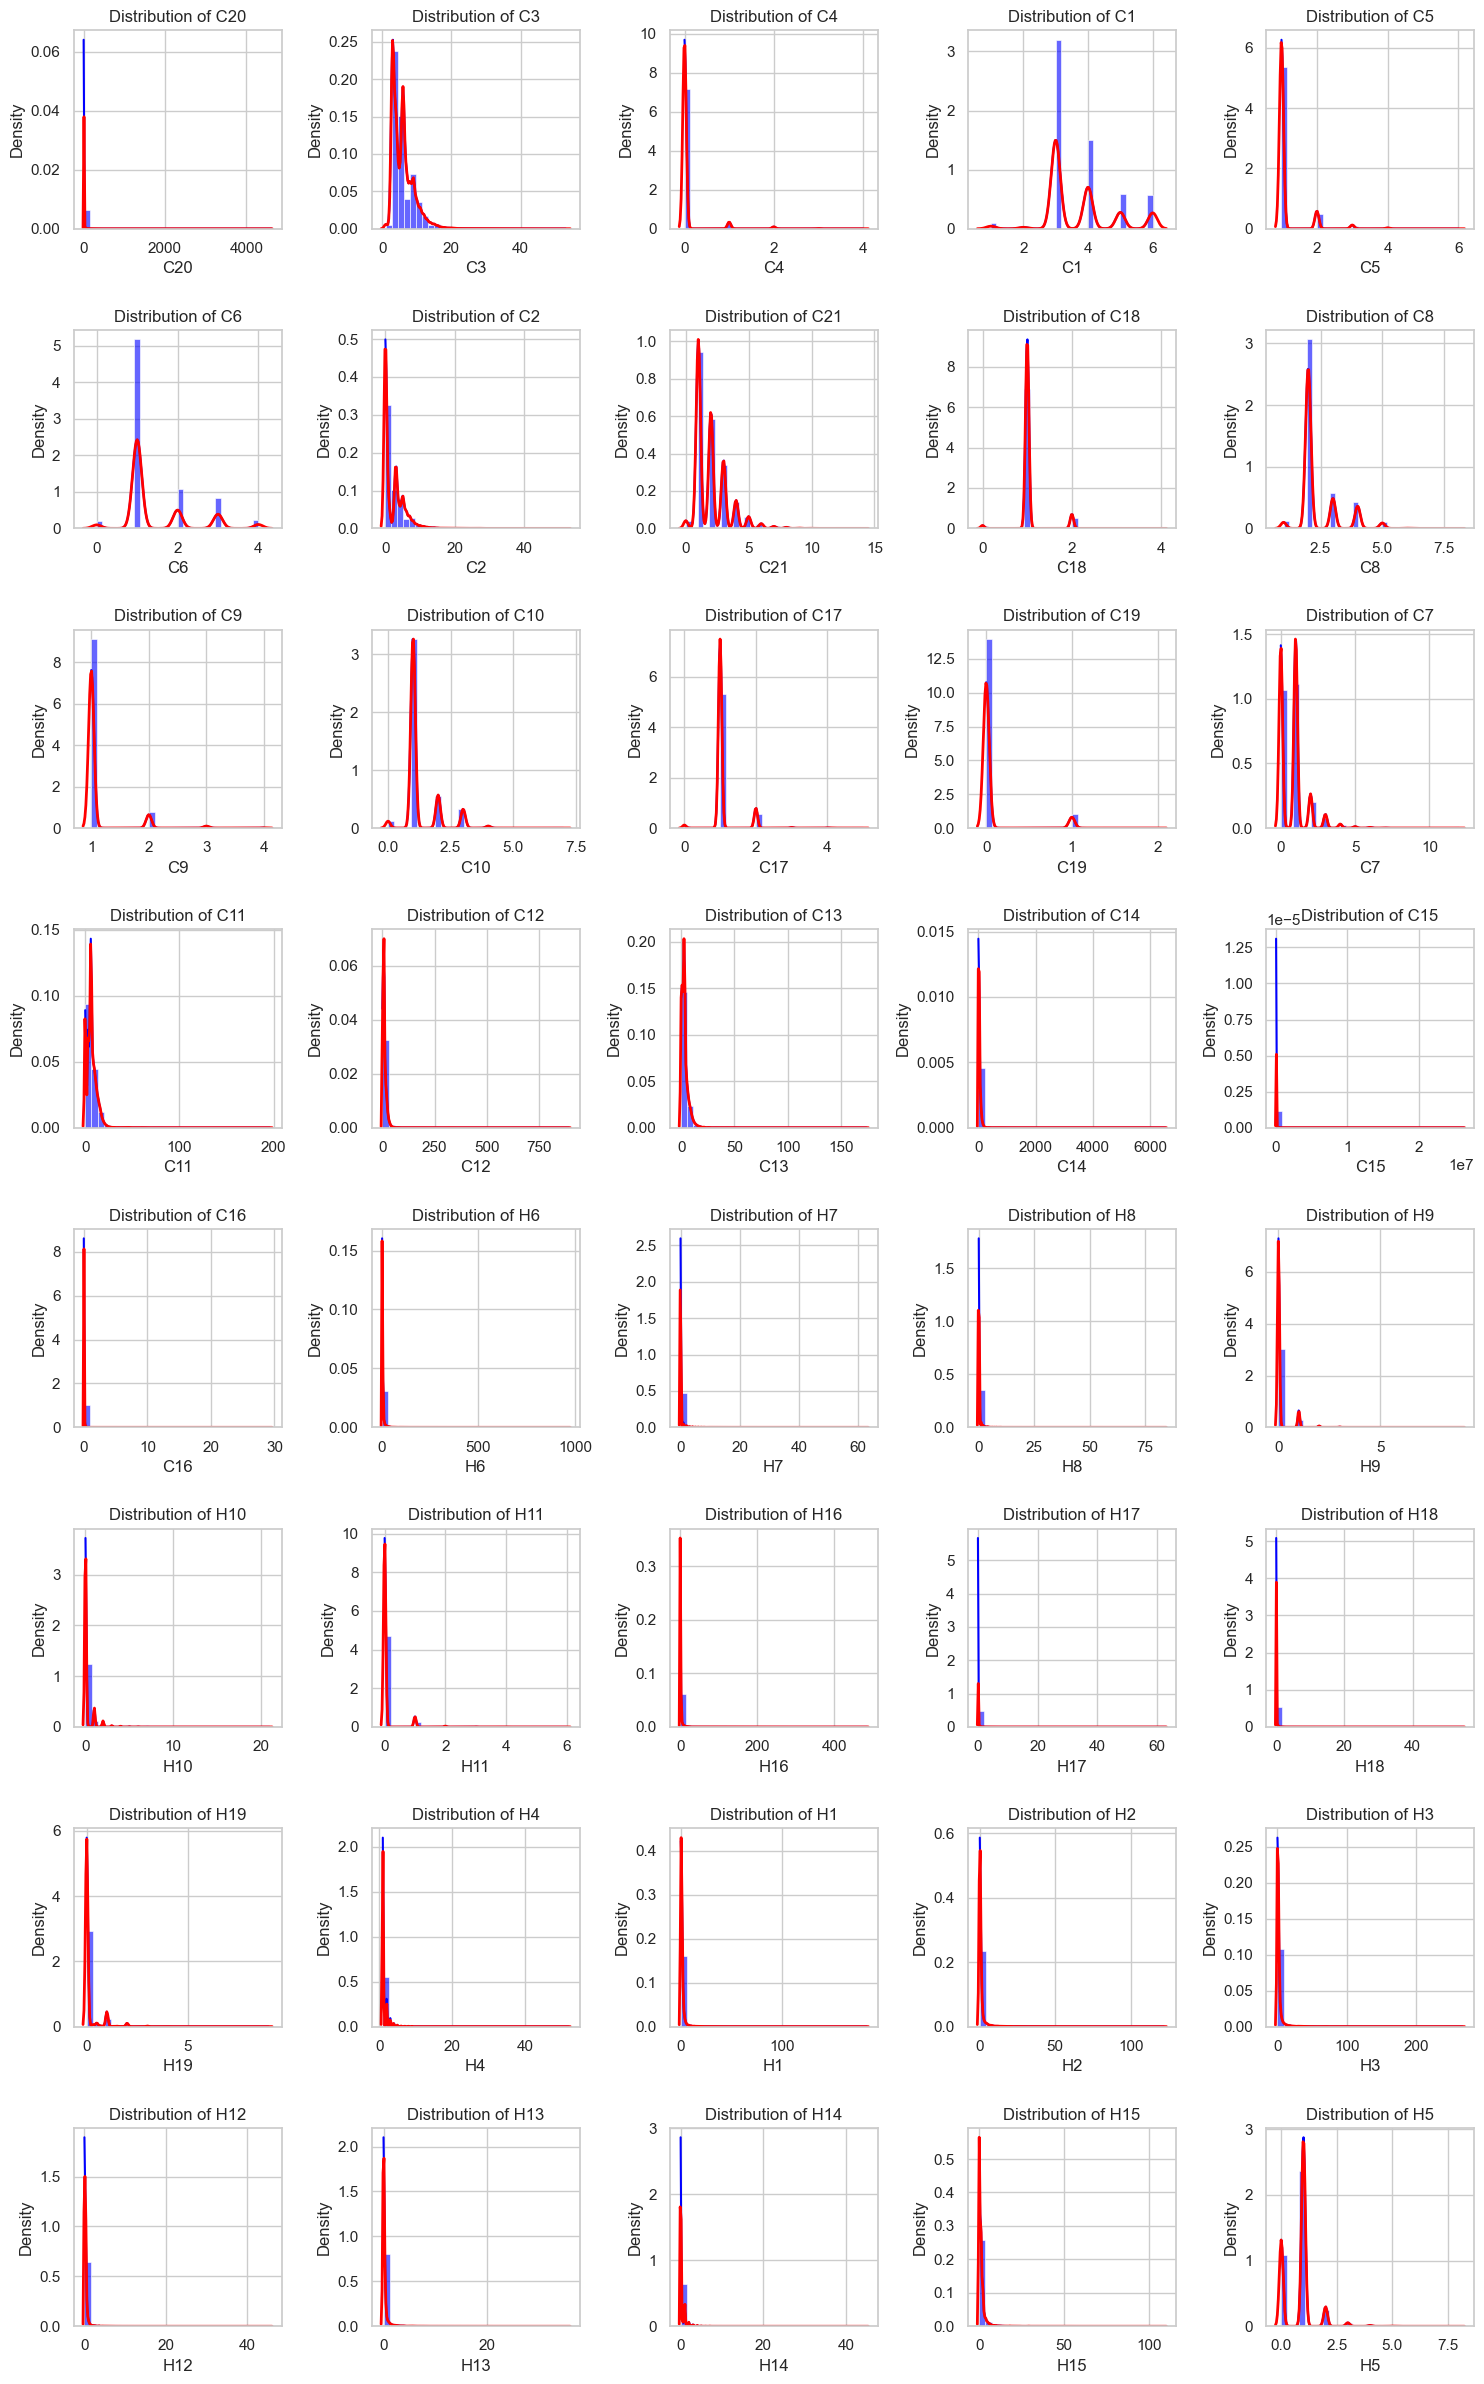

In [68]:
# Plot all distributions
plot_all_distributions(df_s)

array([[<Axes: title={'center': 'C20'}>, <Axes: title={'center': 'C3'}>,
        <Axes: title={'center': 'C4'}>, <Axes: title={'center': 'C1'}>,
        <Axes: title={'center': 'C5'}>, <Axes: title={'center': 'C6'}>],
       [<Axes: title={'center': 'C2'}>, <Axes: title={'center': 'C21'}>,
        <Axes: title={'center': 'C18'}>, <Axes: title={'center': 'C8'}>,
        <Axes: title={'center': 'C9'}>, <Axes: title={'center': 'C10'}>],
       [<Axes: title={'center': 'C17'}>, <Axes: title={'center': 'C19'}>,
        <Axes: title={'center': 'C7'}>, <Axes: title={'center': 'C11'}>,
        <Axes: title={'center': 'C12'}>, <Axes: title={'center': 'C13'}>],
       [<Axes: title={'center': 'C14'}>, <Axes: title={'center': 'C15'}>,
        <Axes: title={'center': 'C16'}>, <Axes: title={'center': 'H6'}>,
        <Axes: title={'center': 'H7'}>, <Axes: title={'center': 'H8'}>],
       [<Axes: title={'center': 'H9'}>, <Axes: title={'center': 'H10'}>,
        <Axes: title={'center': 'H11'}>, <Axes:

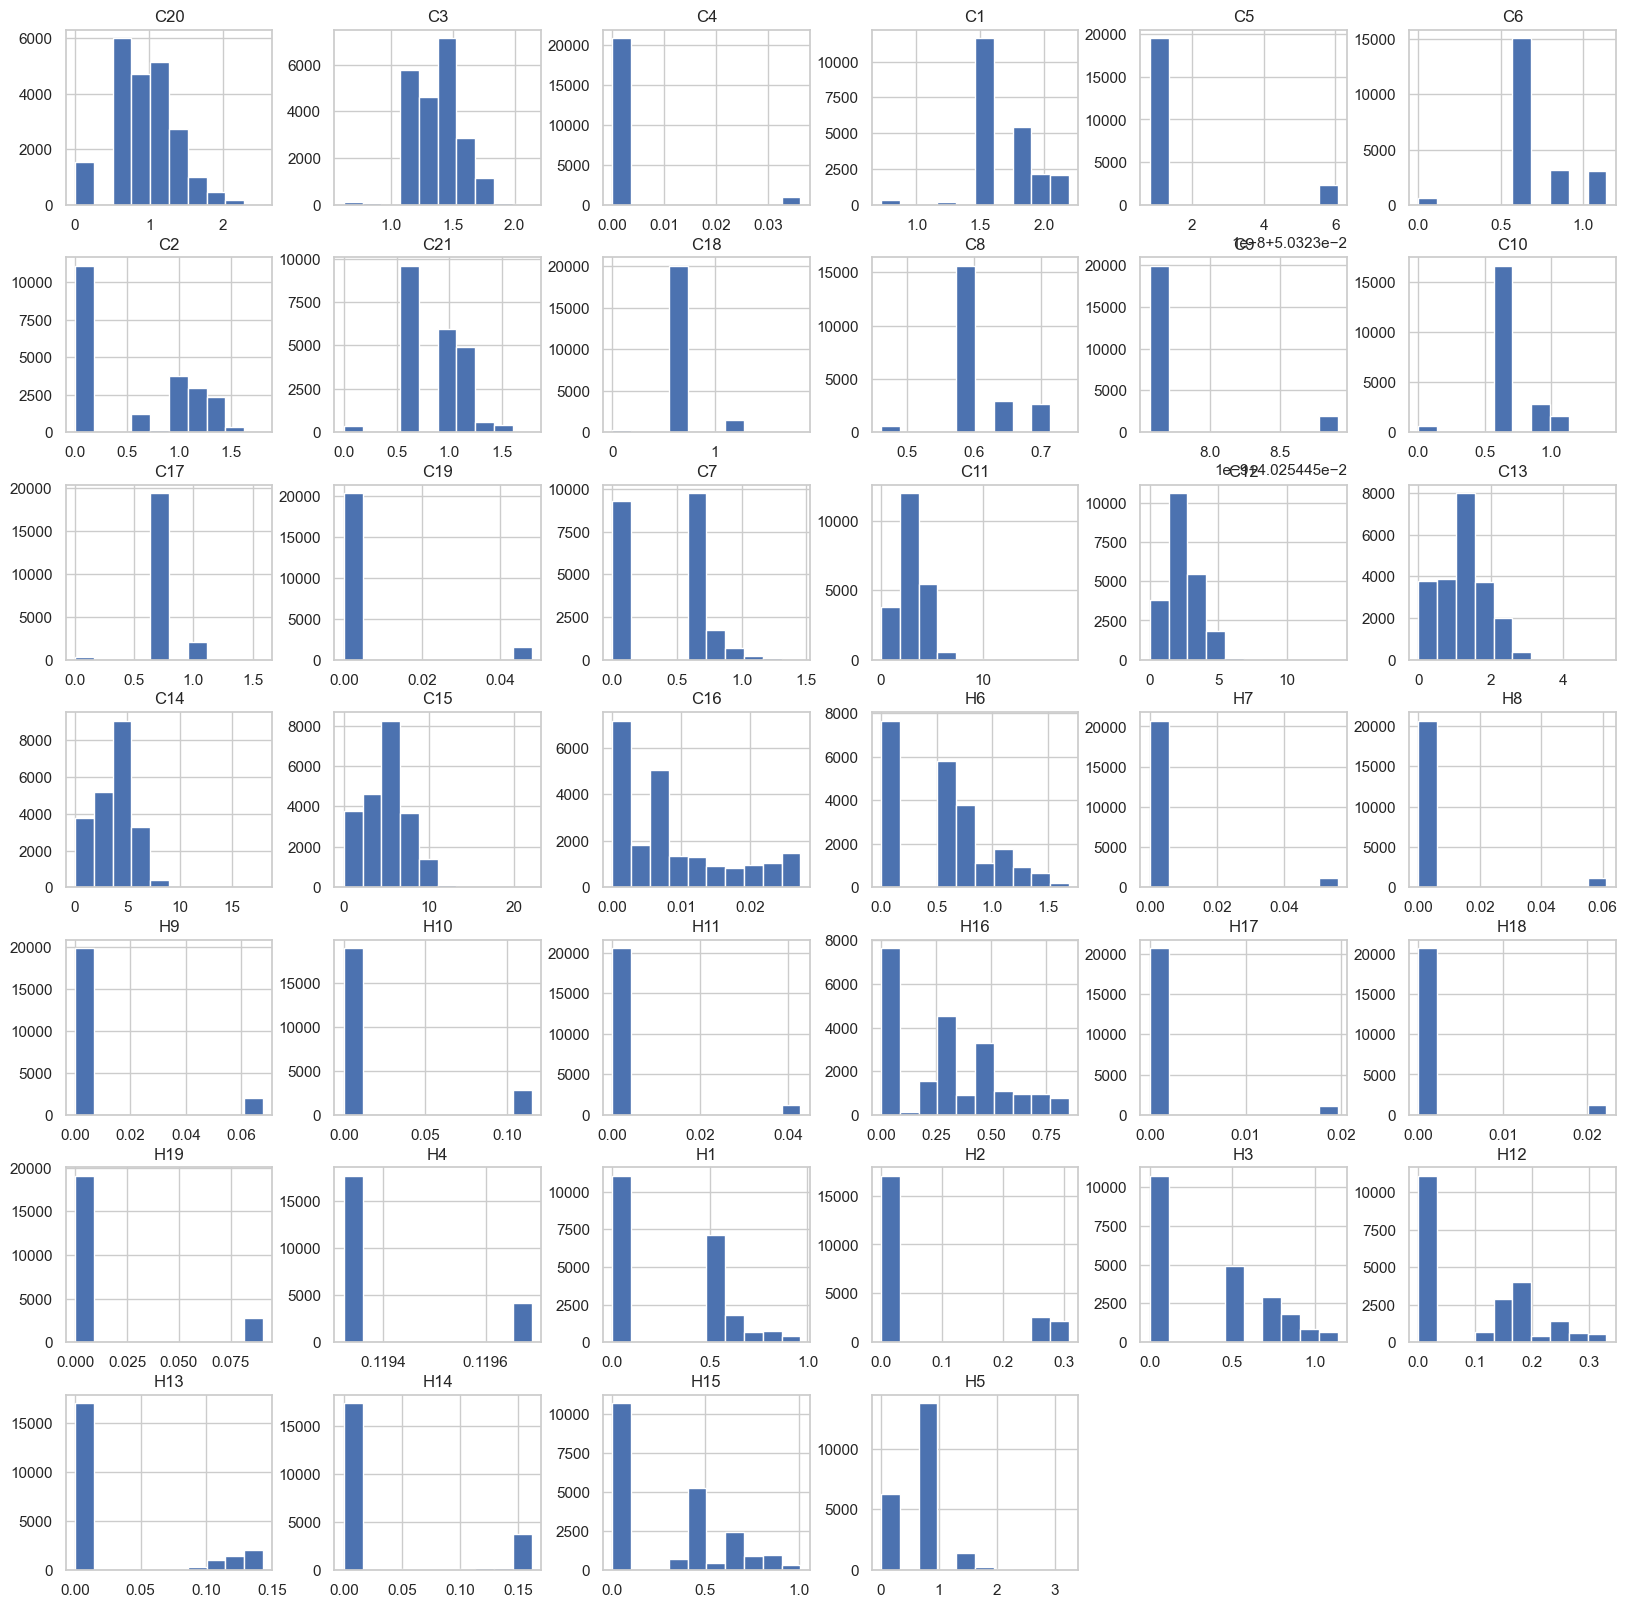

In [8]:

# copy data
data_transform_s = data_s.copy()


# Apply a Box-Cox transformation to the variables with right-skewed distributions since following columns are not transform
# to symmetrical distribution by using logarithmic transformation.

# Import scipy
from scipy import stats

# Apply Box-Cox transformation to each variable
for var in df_s.columns:
    # Adding 1 to handle zero values
    transformed, _ = stats.boxcox(data_transform_s[var] + 1)
    data_transform_s[var] = transformed


# Check the distribution after transformation
data_transform_s[df_s.columns].hist(figsize=(20, 20))


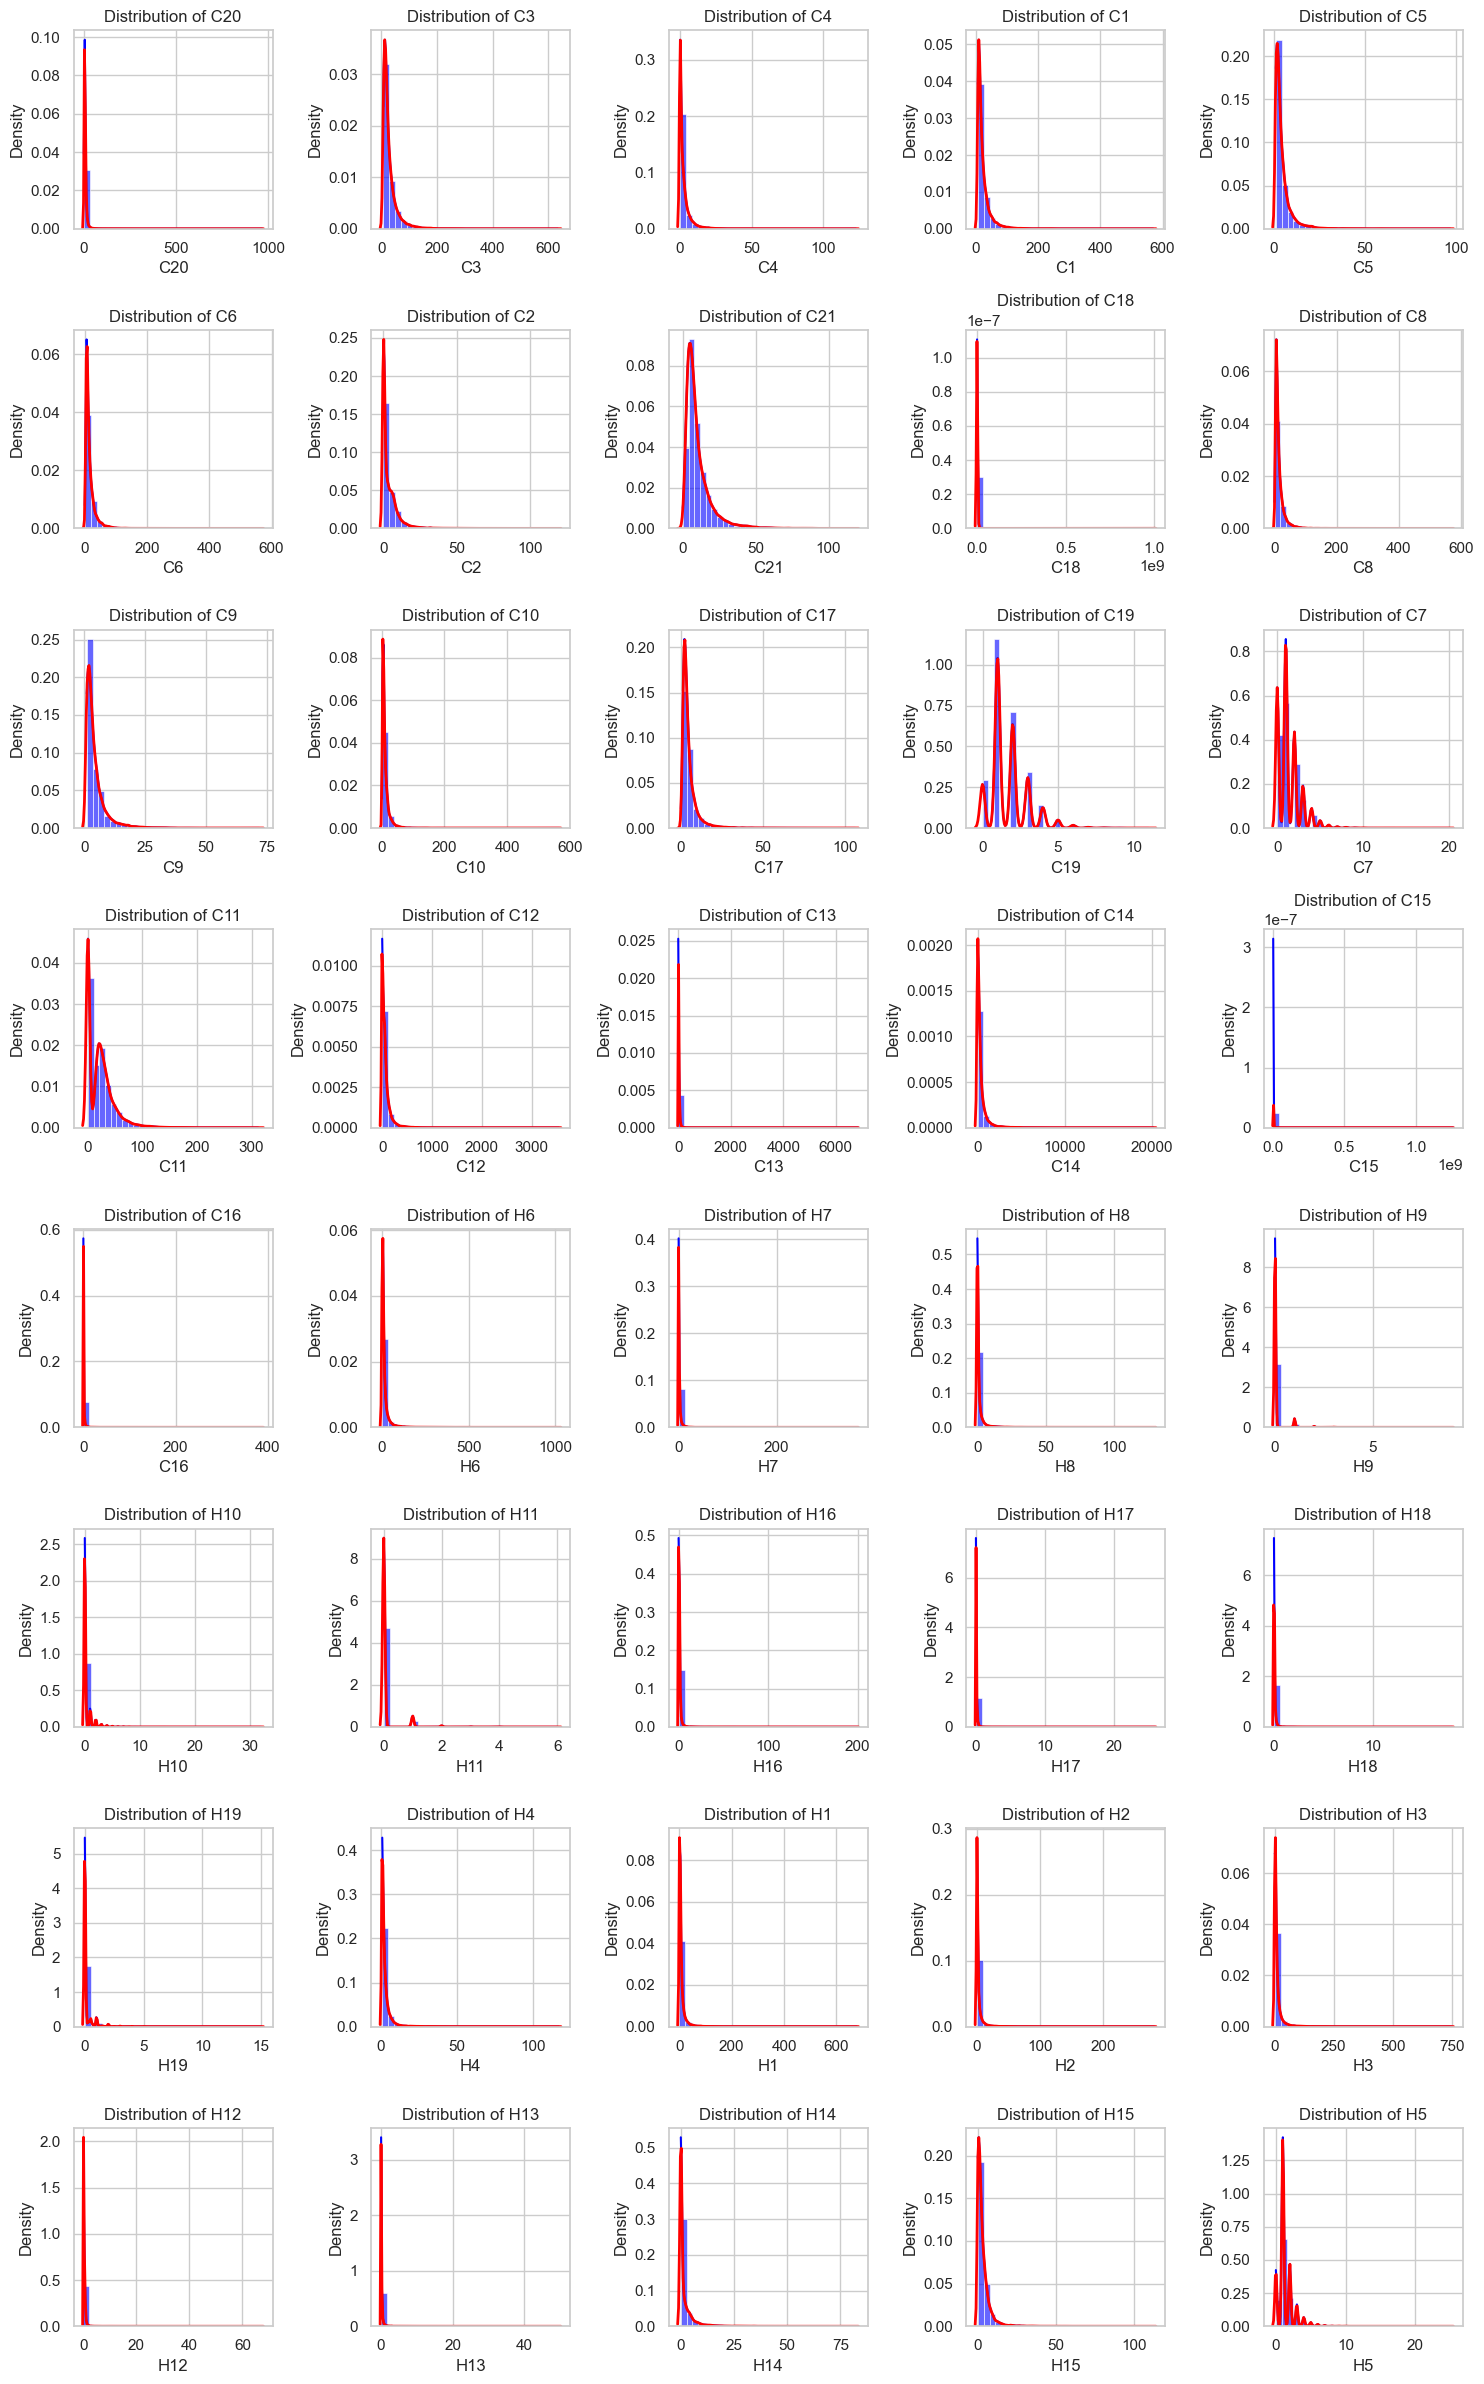

In [70]:
# Plot all distributions
plot_all_distributions(df_l)

array([[<Axes: title={'center': 'C20'}>, <Axes: title={'center': 'C3'}>,
        <Axes: title={'center': 'C4'}>, <Axes: title={'center': 'C1'}>,
        <Axes: title={'center': 'C5'}>, <Axes: title={'center': 'C6'}>],
       [<Axes: title={'center': 'C2'}>, <Axes: title={'center': 'C21'}>,
        <Axes: title={'center': 'C18'}>, <Axes: title={'center': 'C8'}>,
        <Axes: title={'center': 'C9'}>, <Axes: title={'center': 'C10'}>],
       [<Axes: title={'center': 'C17'}>, <Axes: title={'center': 'C19'}>,
        <Axes: title={'center': 'C7'}>, <Axes: title={'center': 'C11'}>,
        <Axes: title={'center': 'C12'}>, <Axes: title={'center': 'C13'}>],
       [<Axes: title={'center': 'C14'}>, <Axes: title={'center': 'C15'}>,
        <Axes: title={'center': 'C16'}>, <Axes: title={'center': 'H6'}>,
        <Axes: title={'center': 'H7'}>, <Axes: title={'center': 'H8'}>],
       [<Axes: title={'center': 'H9'}>, <Axes: title={'center': 'H10'}>,
        <Axes: title={'center': 'H11'}>, <Axes:

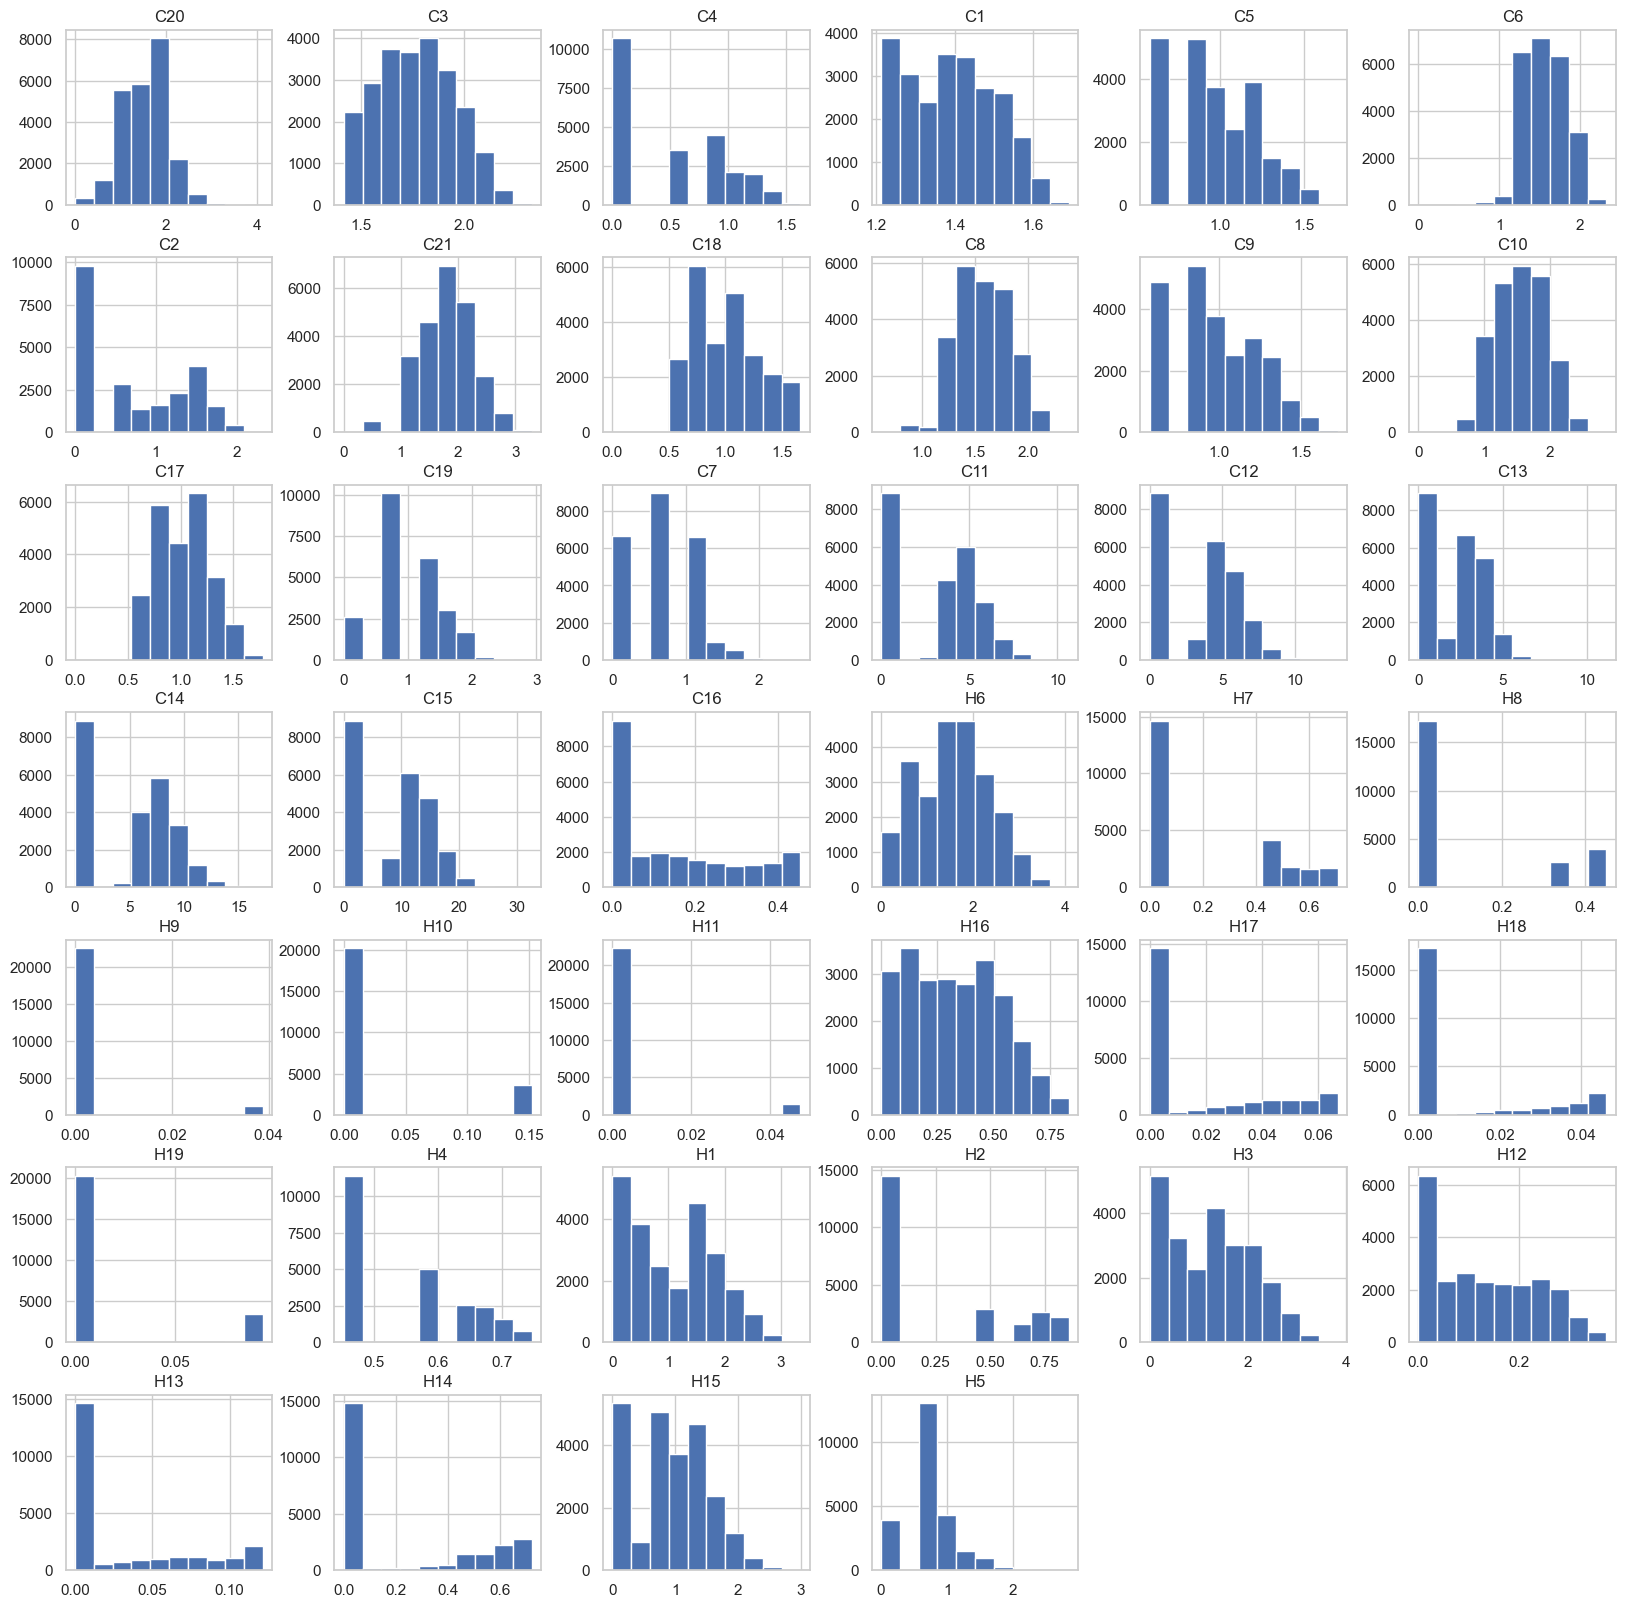

In [9]:

# copy data
data_transform_l = data_l.copy()

# Apply a Box-Cox transformation to the variables with right-skewed distributions since following columns are not transform
# to symmetrical distribution by using logarithmic transformation.

# Import scipy
from scipy import stats

# Apply Box-Cox transformation to each variable
for var in df_l.columns:
    # Adding 1 to handle zero values
    transformed, _ = stats.boxcox(data_transform_l[var] + 1)
    data_transform_l[var] = transformed


# Check the distribution after transformation
data_transform_l[df_l.columns].hist(figsize=(20, 20))


In [10]:

# Convert 'bug-prone' column to 0 and 1
data_transform_s['bug-prone'] = data_transform_s['bug-prone'].apply(lambda x: 1 if x.strip() == 'bug-prone' else 0)
data_transform_l['bug-prone'] = data_transform_l['bug-prone'].apply(lambda x: 1 if x.strip() == 'bug-prone' else 0)

# Display the updated DataFrame
print(data_transform_s.head())  
print(data_transform_l.head()) 


                                          Method name       C20        C3  \
1   org.apache.activemq.transport.amqp.AmqpHeader....  1.301605  1.407033   
3   org.apache.activemq.transport.amqp.AmqpInactiv...  0.609779  1.327391   
8   org.apache.activemq.transport.amqp.AmqpInactiv...  1.301605  1.327391   
9   org.apache.activemq.transport.amqp.AmqpNioSslT...  1.079008  1.095963   
10  org.apache.activemq.transport.amqp.AmqpNioSslT...  0.609779  1.407033   

     C4        C1        C5        C6   C2       C21       C18  ...        H4  \
1   0.0  2.193404  0.050323  1.026603  0.0  1.347521  1.202775  ...  0.119324   
3   0.0  2.000248  0.050323  1.026603  0.0  1.109129  0.733689  ...  0.119324   
8   0.0  2.000248  0.050323  1.026603  0.0  1.244318  0.733689  ...  0.119324   
9   0.0  1.509016  0.050323  0.594005  0.0  0.618611  0.733689  ...  0.119689   
10  0.0  2.193404  0.050323  1.026603  0.0  0.919256  1.202775  ...  0.119324   

          H1        H2        H3       H12       H

In [11]:
# Import libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# split feature data and target data
feature_X_s = data_transform_s.drop(columns=['Method name','bug-prone'])
y_s = data_transform_s['bug-prone']

feature_X_l = data_transform_l.drop(columns=['Method name','bug-prone'])
y_l = data_transform_l['bug-prone']

In [12]:
# Import train_test_split library
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing sets (20%)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(feature_X_s, y_s, test_size=0.2, random_state=42)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(feature_X_l, y_l, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler_s = StandardScaler()
X_train_scaled_s = scaler_s.fit_transform(X_train_s)
X_test_scaled_s = scaler_s.transform(X_test_s)

scaler_l = StandardScaler()
X_train_scaled_l = scaler_l.fit_transform(X_train_l)
X_test_scaled_l = scaler_l.transform(X_test_l)


In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

f_values, p_values = f_classif(X_train_s, y_train_s)
print("Small:")
print("F-values:", f_values)
print("P-values:", p_values)

f_values, p_values = f_classif(X_train_l, y_train_l)
print("Small:")
print("F-values:", f_values)
print("P-values:", p_values)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply ANOVA F-value
k = 10  # Select top 10 features
selector_small = SelectKBest(score_func=f_classif, k=k)
X_train_small_selected = selector_small.fit_transform(X_train_s, y_train_s)

selector_large = SelectKBest(score_func=f_classif, k=k)
X_train_large_selected = selector_large.fit_transform(X_train_l, y_train_l)

# Proceed with SMOTE on the selected features
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled_small, y_train_resampled_small = smote.fit_resample(X_train_small_selected, y_train_small)
# X_train_resampled_large, y_train_resampled_large = smote.fit_resample(X_train_large_selected, y_train_large)


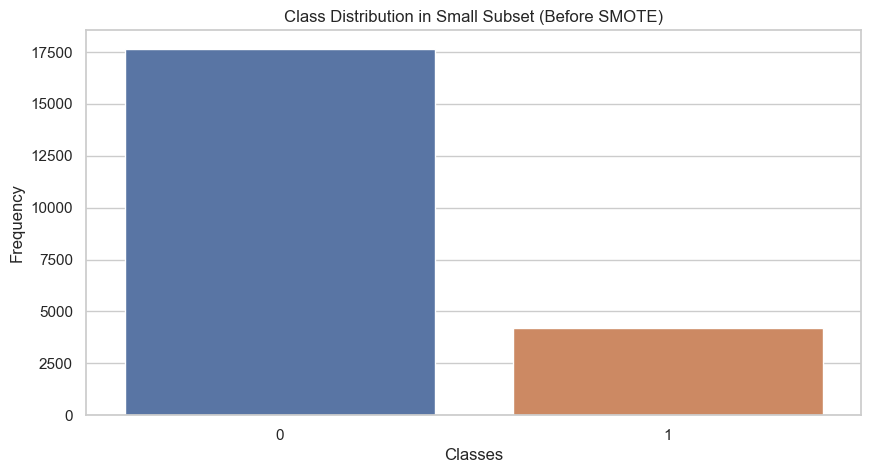

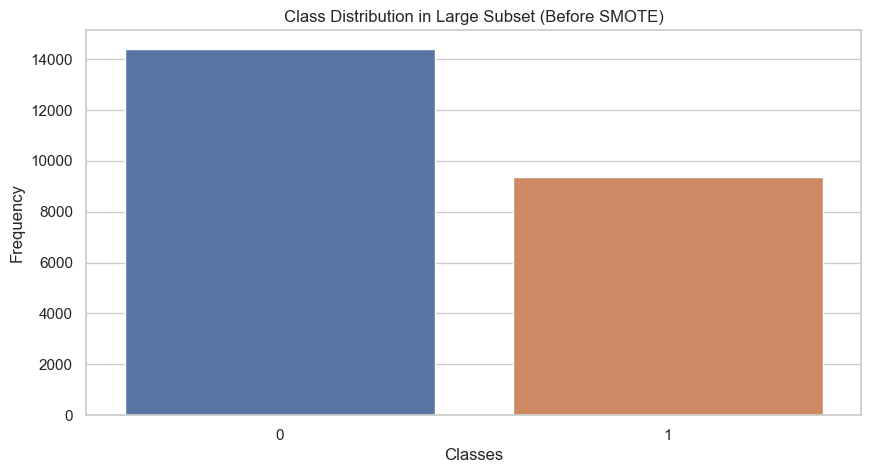

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution for small subset
plt.figure(figsize=(10, 5))
sns.countplot(x=y_s)
plt.title("Class Distribution in Small Subset (Before SMOTE)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

# Plot class distribution for large subset
plt.figure(figsize=(10, 5))
sns.countplot(x=y_l)
plt.title("Class Distribution in Large Subset (Before SMOTE)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()


In [14]:
print("Small Subset Class Distribution:")
print(y_s.value_counts())

print("Large Subset Class Distribution:")
print(y_l.value_counts())


Small Subset Class Distribution:
bug-prone
0    17661
1     4190
Name: count, dtype: int64
Large Subset Class Distribution:
bug-prone
0    14410
1     9381
Name: count, dtype: int64


In [15]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to small subset
X_train_resampled_s, y_train_resampled_s = smote.fit_resample(X_train_scaled_s, y_train_s)

# Apply SMOTE to large subset
X_train_resampled_l, y_train_resampled_l = smote.fit_resample(X_train_scaled_l, y_train_l)


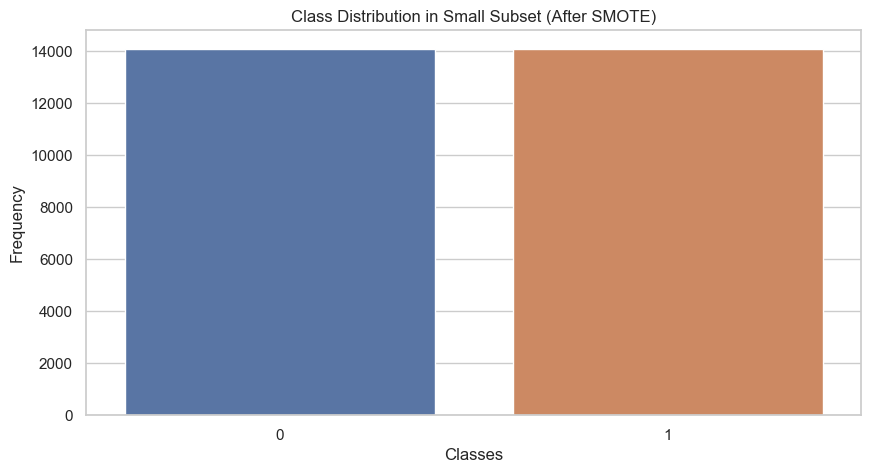

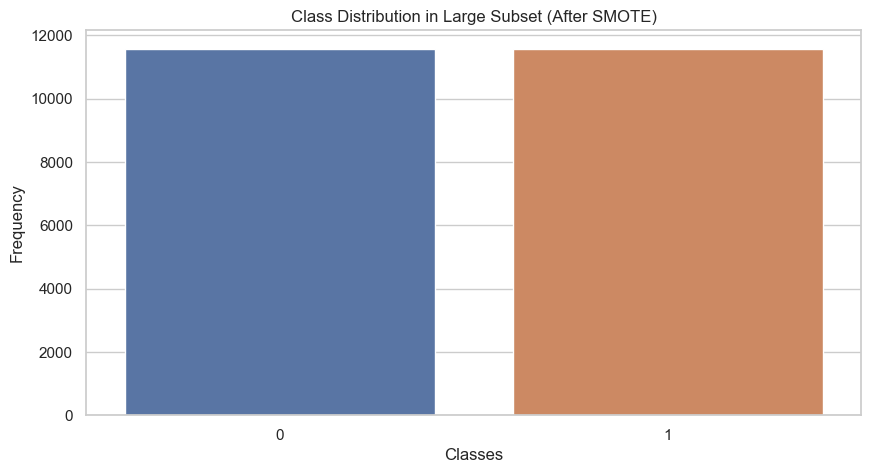

In [16]:
# Plot class distribution for small subset after SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_resampled_s)
plt.title("Class Distribution in Small Subset (After SMOTE)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

# Plot class distribution for large subset after SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_resampled_l)
plt.title("Class Distribution in Large Subset (After SMOTE)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()


In [17]:
print("Small Subset Class Distribution After SMOTE:")
print(pd.Series(y_train_resampled_s).value_counts())

print("Large Subset Class Distribution After SMOTE:")
print(pd.Series(y_train_resampled_l).value_counts())


Small Subset Class Distribution After SMOTE:
bug-prone
0    14097
1    14097
Name: count, dtype: int64
Large Subset Class Distribution After SMOTE:
bug-prone
1    11576
0    11576
Name: count, dtype: int64


In [22]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': make_scorer(roc_auc_score) # , needs_proba=True
}

# Perform cross-validation
cv_results_s = cross_validate(rf_classifier, X_train_resampled_s, y_train_resampled_s, cv=10, scoring=scoring)
cv_results_l = cross_validate(rf_classifier, X_train_resampled_l, y_train_resampled_l, cv=10, scoring=scoring)

# Extract metrics
print("Small:")
print(f"Accuracy: {cv_results_s['test_accuracy'].mean():.4f} ± {cv_results_s['test_accuracy'].std():.4f}")
print(f"Precision: {cv_results_s['test_precision'].mean():.4f} ± {cv_results_s['test_precision'].std():.4f}")
print(f"Recall: {cv_results_s['test_recall'].mean():.4f} ± {cv_results_s['test_recall'].std():.4f}")
print(f"F1-Score: {cv_results_s['test_f1'].mean():.4f} ± {cv_results_s['test_f1'].std():.4f}")
print(f"MCC: {cv_results_s['test_mcc'].mean():.4f} ± {cv_results_s['test_mcc'].std():.4f}")
print(f"AUC: {cv_results_s['test_auc'].mean():.4f} ± {cv_results_s['test_auc'].std():.4f}")


print("large:")
print(f"Accuracy: {cv_results_l['test_accuracy'].mean():.4f} ± {cv_results_l['test_accuracy'].std():.4f}")
print(f"Precision: {cv_results_l['test_precision'].mean():.4f} ± {cv_results_l['test_precision'].std():.4f}")
print(f"Recall: {cv_results_l['test_recall'].mean():.4f} ± {cv_results_l['test_recall'].std():.4f}")
print(f"F1-Score: {cv_results_l['test_f1'].mean():.4f} ± {cv_results_l['test_f1'].std():.4f}")
print(f"MCC: {cv_results_l['test_mcc'].mean():.4f} ± {cv_results_l['test_mcc'].std():.4f}")
print(f"AUC: {cv_results_l['test_auc'].mean():.4f} ± {cv_results_l['test_auc'].std():.4f}")

# Small:
# Accuracy: 0.8527 ± 0.0724
# Precision: 0.8425 ± 0.0437
# Recall: 0.8644 ± 0.1278
# F1-Score: 0.8501 ± 0.0803
# MCC: 0.7110 ± 0.1461
# AUC: 0.8527 ± 0.0724
# large:
# Accuracy: 0.7632 ± 0.0312
# Precision: 0.7652 ± 0.0448
# Recall: 0.7649 ± 0.0380
# F1-Score: 0.7638 ± 0.0278
# MCC: 0.5279 ± 0.0625
# AUC: 0.7631 ± 0.0312

Small:
Accuracy: 0.8951 ± 0.0659
Precision: 0.8990 ± 0.0095
Recall: 0.8890 ± 0.1417
F1-Score: 0.8882 ± 0.0826
MCC: 0.7977 ± 0.1230
AUC: 0.8951 ± 0.0659
large:
Accuracy: 0.7963 ± 0.0689
Precision: 0.8038 ± 0.0199
Recall: 0.7792 ± 0.1503
F1-Score: 0.7858 ± 0.0841
MCC: 0.6012 ± 0.1411
AUC: 0.7963 ± 0.0689


In [82]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1',  # Choose metric based on your objective
    cv=5,
    n_iter=50,  # Number of random combinations to try
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}
Best F1 score: 0.8775


In [83]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier_s = RandomForestClassifier(n_estimators=179, random_state=42,
                                        bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=3)
rf_classifier_l = RandomForestClassifier(n_estimators=179, random_state=42, 
                                        bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=3)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),  # Binary classification
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'  # Use the built-in scorer for AUC
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    rf_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    rf_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)

# Small:
# Accuracy: 0.8585 ± 0.0638
# Precision: 0.8464 ± 0.0368
# Recall: 0.8741 ± 0.1192
# F1: 0.8569 ± 0.0711
# Mcc: 0.7228 ± 0.1294
# Auc: 0.9358 ± 0.0462

# Large:
# Accuracy: 0.7534 ± 0.0340
# Precision: 0.7439 ± 0.0402
# Recall: 0.7775 ± 0.0502
# F1: 0.7590 ± 0.0330
# Mcc: 0.5092 ± 0.0678
# Auc: 0.8549 ± 0.0330


Small:
Accuracy: 0.8984 ± 0.0692
Precision: 0.9068 ± 0.0093
Recall: 0.8867 ± 0.1471
F1: 0.8903 ± 0.0873
Mcc: 0.8045 ± 0.1279
Auc: 0.9627 ± 0.0380

Large:
Accuracy: 0.8012 ± 0.0698
Precision: 0.8075 ± 0.0227
Recall: 0.7863 ± 0.1486
F1: 0.7915 ± 0.0839
Mcc: 0.6108 ± 0.1431
Auc: 0.8968 ± 0.0644


In [84]:
# Fit the model with the SMOTE-resampled training data
rf_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
rf_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)

# Evaluate on the original test data
from sklearn.metrics import classification_report

print("Small Dataset Test Performance:")
y_pred_s = rf_classifier_s.predict(X_test_scaled_s)
print(classification_report(y_test_s, y_pred_s))

print("Large Dataset Test Performance:")
y_pred_l = rf_classifier_l.predict(X_test_scaled_l)
print(classification_report(y_test_l, y_pred_l))


Small Dataset Test Performance:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      3564
           1       0.59      0.50      0.54       807

    accuracy                           0.84      4371
   macro avg       0.74      0.71      0.72      4371
weighted avg       0.83      0.84      0.84      4371

Large Dataset Test Performance:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      2834
           1       0.71      0.61      0.66      1925

    accuracy                           0.74      4759
   macro avg       0.74      0.72      0.73      4759
weighted avg       0.74      0.74      0.74      4759



In [92]:
# Check training score
rf_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = rf_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = rf_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
rf_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = rf_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = rf_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")

# Small Dataset - Training Score: 0.9733, Test Score: 0.7745
# Large Dataset - Training Score: 0.9960, Test Score: 0.7354

Small Dataset - Training Score: 0.9789, Test Score: 0.8433
Large Dataset - Training Score: 0.9999, Test Score: 0.7430


In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # For base estimator

# Define the parameter distributions for AdaBoostClassifier
param_dist = {
    'n_estimators': randint(50, 300),  # Number of weak learners
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5]  # Step size
#     'base_estimator': [DecisionTreeClassifier(max_depth=d) for d in [1, 2, 3, 5]]  # Weak learner configurations
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1', 
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

# Fitting 5 folds for each of 50 candidates, totalling 250 fits
# Best parameters: {'learning_rate': 0.5, 'n_estimators': 252}
# Best F1 score: 0.7755

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'learning_rate': 1.0, 'n_estimators': 211}
Best F1 score: 0.7214


In [90]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import AdaBoostClassifier

ada_classifier_s = AdaBoostClassifier(n_estimators=252, random_state=42, learning_rate=0.5)
ada_classifier_l = AdaBoostClassifier(n_estimators=211, random_state=42, learning_rate=1)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),  # Binary classification
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'  # Use the built-in scorer for AUC
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    ada_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    ada_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)

# Small:
# Accuracy: 0.7688 ± 0.0447
# Precision: 0.7457 ± 0.0172
# Recall: 0.8123 ± 0.1072
# F1: 0.7748 ± 0.0608
# Mcc: 0.5441 ± 0.0909
# Auc: 0.8804 ± 0.0483

# Large:
# Accuracy: 0.7352 ± 0.0497
# Precision: 0.7540 ± 0.0248
# Recall: 0.6935 ± 0.1029
# F1: 0.7201 ± 0.0656
# Mcc: 0.4742 ± 0.0972
# Auc: 0.8262 ± 0.0522


Small:
Accuracy: 0.7961 ± 0.0627
Precision: 0.7892 ± 0.0193
Recall: 0.8035 ± 0.1467
F1: 0.7902 ± 0.0889
Mcc: 0.5992 ± 0.1204
Auc: 0.9030 ± 0.0549

Large:
Accuracy: 0.7551 ± 0.0746
Precision: 0.7777 ± 0.0274
Recall: 0.7064 ± 0.1626
F1: 0.7334 ± 0.0985
Mcc: 0.5195 ± 0.1469
Auc: 0.8451 ± 0.0760


In [91]:
# Check training score
ada_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = ada_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = ada_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
ada_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = ada_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = ada_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.8058, Test Score: 0.7543
Large Dataset - Training Score: 0.7699, Test Score: 0.7119


In [97]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(10, 200),
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'estimator': [DecisionTreeClassifier(max_depth=d) for d in [1, 5, 10]]
}
# ValueError: Invalid parameter 'base_estimator' for estimator BaggingClassifier(random_state=42). 
#     Valid parameters are: ['bootstrap', 'bootstrap_features', 'estimator', 
#                         'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 
#                         'random_state', 'verbose', 'warm_start'].
        
        
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=BaggingClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'bootstrap': True, 'bootstrap_features': False, 'estimator': DecisionTreeClassifier(max_depth=10), 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 174}
Best F1 score: 0.7376


In [98]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import BaggingClassifier

bagging_classifier_s = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10), n_estimators=84, random_state=42,
                                        bootstrap=True, bootstrap_features=True, max_features=0.7, max_samples=
                                         1.0)
bagging_classifier_l = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10), n_estimators=174, random_state=42,
                                        bootstrap=True, bootstrap_features=False, max_features=0.5, max_samples=
                                         0.7)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    bagging_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    bagging_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.8427 ± 0.0696
Precision: 0.8390 ± 0.0091
Recall: 0.8465 ± 0.1642
F1: 0.8342 ± 0.0969
Mcc: 0.6954 ± 0.1302
Auc: 0.9378 ± 0.0472

Large:
Accuracy: 0.7653 ± 0.0712
Precision: 0.7848 ± 0.0248
Recall: 0.7243 ± 0.1544
F1: 0.7473 ± 0.0920
Mcc: 0.5391 ± 0.1412
Auc: 0.8570 ± 0.0658


In [99]:
# Check training score
bagging_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = bagging_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = bagging_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
bagging_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = bagging_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = bagging_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.8764, Test Score: 0.7911
Large Dataset - Training Score: 0.8074, Test Score: 0.7245


In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_neighbors': randint(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'p': [1, 2, 3],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
Best F1 score: 0.8107


In [105]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_s = KNeighborsClassifier(n_neighbors=2, algorithm='auto', metric='manhattan', p=3, weights='distance')
knn_classifier_l = KNeighborsClassifier(n_neighbors=2, algorithm='auto', metric='manhattan', p=3, weights='distance')

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    knn_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    knn_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.8935 ± 0.0134
Precision: 0.8876 ± 0.0050
Recall: 0.9010 ± 0.0313
F1: 0.8940 ± 0.0155
Mcc: 0.7875 ± 0.0266
Auc: 0.9190 ± 0.0170

Large:
Accuracy: 0.8054 ± 0.0443
Precision: 0.7721 ± 0.0161
Recall: 0.8642 ± 0.0932
F1: 0.8140 ± 0.0492
Mcc: 0.6197 ± 0.0996
Auc: 0.8482 ± 0.0464


In [106]:
# Check training score
knn_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = knn_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = knn_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
knn_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = knn_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = knn_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.9729, Test Score: 0.8261
Large Dataset - Training Score: 0.9999, Test Score: 0.6947


In [108]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'var_smoothing': [1e-12, 1e-9, 1e-6, 1e-3, 1.0]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GaussianNB(),
    param_distributions=param_dist,
    scoring='f1',  # Choose your evaluation metric
    cv=5,
    n_iter=20,  # Number of random combinations
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'var_smoothing': 0.001}
Best F1 score: 0.6632


In [109]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.naive_bayes import GaussianNB

nb_classifier_s = GaussianNB(var_smoothing=1e-12)
nb_classifier_l = GaussianNB(var_smoothing=0.001)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    nb_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    nb_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.6638 ± 0.0068
Precision: 0.6807 ± 0.0079
Recall: 0.6169 ± 0.0108
F1: 0.6472 ± 0.0079
Mcc: 0.3290 ± 0.0137
Auc: 0.7497 ± 0.0071

Large:
Accuracy: 0.6746 ± 0.0112
Precision: 0.6876 ± 0.0113
Recall: 0.6402 ± 0.0204
F1: 0.6629 ± 0.0139
Mcc: 0.3502 ± 0.0223
Auc: 0.7532 ± 0.0099


In [110]:
# Check training score
nb_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = nb_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = nb_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
nb_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = nb_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = nb_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.6640, Test Score: 0.6916
Large Dataset - Training Score: 0.6754, Test Score: 0.6825


In [113]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.6, 0.4),
    'max_features': ['sqrt', 'log2', None],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'learning_rate': 0.1956637125175451, 'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 165, 'subsample': 0.7177795568278342}
Best F1 score: 0.7829


In [114]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier_s = GradientBoostingClassifier(loss='exponential', n_estimators=165, random_state=42, 
                                             learning_rate=0.1956637125175451, max_depth=19, max_features='log2', 
                                             min_samples_leaf=3, min_samples_split=2, subsample=0.7177795568278342)
gb_classifier_l = GradientBoostingClassifier(loss='exponential', n_estimators=165, random_state=42,
                                            learning_rate=0.1956637125175451, max_depth=19, max_features='log2', 
                                             min_samples_leaf=3, min_samples_split=2, subsample=0.7177795568278342)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    gb_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    gb_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.8974 ± 0.0635
Precision: 0.8965 ± 0.0080
Recall: 0.8977 ± 0.1383
F1: 0.8916 ± 0.0791
Mcc: 0.8024 ± 0.1194
Auc: 0.9650 ± 0.0386

Large:
Accuracy: 0.7982 ± 0.0647
Precision: 0.7964 ± 0.0194
Recall: 0.7969 ± 0.1420
F1: 0.7920 ± 0.0778
Mcc: 0.6046 ± 0.1354
Auc: 0.8944 ± 0.0635


In [115]:
# Check training score
gb_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = gb_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = gb_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
gb_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = gb_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = gb_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.9788, Test Score: 0.8399
Large Dataset - Training Score: 0.9999, Test Score: 0.7306


In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': randint(2, 50),
    'min_impurity_decrease': uniform(0.0, 0.1),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1',  
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'criterion': 'log_loss', 'max_depth': 47, 'max_features': 'log2', 'max_leaf_nodes': 45, 'min_impurity_decrease': 0.05142344384136116, 'min_samples_leaf': 3, 'min_samples_split': 6, 'splitter': 'best'}
Best F1 score: 0.7333


In [118]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.tree import DecisionTreeClassifier

dt_classifier_s = DecisionTreeClassifier(criterion='log_loss', max_depth=29, max_features=None, max_leaf_nodes=44, 
                                         min_impurity_decrease=0.07796910002727693, min_samples_leaf=7, 
                                         min_samples_split=12, splitter='best')
dt_classifier_l = DecisionTreeClassifier(criterion='log_loss', max_depth=47, max_features='log2', max_leaf_nodes=45, 
                                         min_impurity_decrease=.05142344384136116, min_samples_leaf=3, 
                                         min_samples_split=6, splitter='best')

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    dt_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    dt_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.6771 ± 0.0059
Precision: 0.6076 ± 0.0044
Recall: 1.0000 ± 0.0000
F1: 0.7559 ± 0.0034
Mcc: 0.4639 ± 0.0094
Auc: 0.6771 ± 0.0059

Large:
Accuracy: 0.6304 ± 0.0464
Precision: 0.5667 ± 0.2016
Recall: 0.7469 ± 0.3287
F1: 0.6190 ± 0.2154
Mcc: 0.3335 ± 0.1193
Auc: 0.6490 ± 0.0639


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [119]:
# Check training score
dt_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = dt_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = dt_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
dt_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = dt_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = dt_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.6771, Test Score: 0.4825
Large Dataset - Training Score: 0.6513, Test Score: 0.5894


In [121]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'max_leaf_nodes': randint(10, 100),
    'min_impurity_decrease': uniform(0.0, 0.1),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ExtraTreesClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1',  # Choose your evaluation metric
    cv=5,
    n_iter=50,  # Number of random combinations
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 46, 'max_features': None, 'max_leaf_nodes': 63, 'min_impurity_decrease': 0.0696029796674973, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 73}
Best F1 score: 0.7315


In [122]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import ExtraTreesClassifier

et_classifier_s = ExtraTreesClassifier(bootstrap=False, criterion='gini', max_depth=10, max_features=None, 
                                       max_leaf_nodes=46, min_impurity_decrease=0.09283185625877255, min_samples_leaf=17, 
                                       min_samples_split=15, n_estimators=230)
et_classifier_l = ExtraTreesClassifier(bootstrap=False, criterion='gini', max_depth=46, max_features=None, 
                                       max_leaf_nodes=63, min_impurity_decrease=0.0696029796674973, min_samples_leaf=8, 
                                       min_samples_split=15, n_estimators=73)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    et_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    et_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.6814 ± 0.0093
Precision: 0.6172 ± 0.0187
Recall: 0.9669 ± 0.0662
F1: 0.7516 ± 0.0098
Mcc: 0.4534 ± 0.0245
Auc: 0.7005 ± 0.0246

Large:
Accuracy: 0.6503 ± 0.0082
Precision: 0.5938 ± 0.0061
Recall: 0.9515 ± 0.0074
F1: 0.7313 ± 0.0050
Mcc: 0.3766 ± 0.0160
Auc: 0.7706 ± 0.0124


In [123]:
# Check training score
et_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = et_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = et_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
et_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = et_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = et_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.6771, Test Score: 0.4825
Large Dataset - Training Score: 0.6512, Test Score: 0.5938


In [126]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'max_iter': randint(50, 500),
    'max_leaf_nodes': randint(10, 100),
    'max_depth': [None] + list(range(3, 51)),
    'min_samples_leaf': randint(1, 20),
    'l2_regularization': uniform(0.0, 1.0),
    'max_bins': randint(50, 255),
    'early_stopping': [True, False],
    'scoring': ['loss', 'accuracy', 'f1', 'roc_auc'],
    'loss': ['log_loss']
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'early_stopping': False, 'l2_regularization': 0.5426446347075766, 'learning_rate': 0.09596237563848531, 'loss': 'log_loss', 'max_bins': 107, 'max_depth': 23, 'max_iter': 354, 'max_leaf_nodes': 61, 'min_samples_leaf': 10, 'scoring': 'accuracy'}
Best F1 score: 0.7540


In [23]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_classifier_s = HistGradientBoostingClassifier(early_stopping=False, l2_regularization=0.0516817211686077, 
                                                  learning_rate=0.1694063894704444, loss='log_loss', max_bins=96, 
                                                  max_depth=36, max_iter=360, max_leaf_nodes=49, min_samples_leaf=16, 
                                                  scoring='loss')
hgb_classifier_l = HistGradientBoostingClassifier(early_stopping=False, l2_regularization=0.5426446347075766, 
                                                  learning_rate=0.09596237563848531, loss='log_loss', max_bins=107, 
                                                  max_depth=23, max_iter=354, max_leaf_nodes=61, min_samples_leaf=10, 
                                                  scoring='accuracy')

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    hgb_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    hgb_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.8841 ± 0.0945
Precision: 0.9047 ± 0.0157
Recall: 0.8550 ± 0.2000
F1: 0.8665 ± 0.1304
Mcc: 0.7807 ± 0.1698
Auc: 0.9582 ± 0.0544

Large:
Accuracy: 0.7827 ± 0.0816
Precision: 0.7994 ± 0.0244
Recall: 0.7473 ± 0.1773
F1: 0.7645 ± 0.1028
Mcc: 0.5769 ± 0.1643
Auc: 0.8776 ± 0.0777


In [24]:
# Check training score
hgb_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = hgb_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = hgb_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
hgb_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = hgb_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = hgb_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.9684, Test Score: 0.8396
Large Dataset - Training Score: 0.9753, Test Score: 0.7329


In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution for MLPClassifier
# param_dist = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50, 100, 50)],  # Various layer configurations
#     'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
#     'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers for optimization
#     'alpha': uniform(0.0001, 0.01),  # L2 penalty (regularization term)
#     'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedules
#     'learning_rate_init': uniform(0.0001, 0.1),  # Initial learning rate
#     'max_iter': randint(100, 500),  # Maximum number of iterations
#     'batch_size': [32, 64, 128, 'auto']  # Batch size for training
# }
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50, 100, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': uniform(0.0001, 0.01),
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': uniform(0.01, 0.1),  
    'max_iter': randint(200, 1000), 
    'batch_size': [32, 64, 128, 'auto']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=MLPClassifier(),
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

# Fitting 5 folds for each of 50 candidates, totalling 250 fits
# Best parameters: {'activation': 'relu', 'alpha': 0.006599639307777652, 'batch_size': 'auto', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.033899515685153585, 'max_iter': 191, 'random_state': 42, 'solver': 'sgd'}
# Best F1 score: 0.8821

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'activation': 'tanh', 'alpha': 0.0006808361216819947, 'batch_size': 'auto', 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.012058449429580245, 'max_iter': 969, 'solver': 'sgd'}
Best F1 score: 0.8808


In [36]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.neural_network import MLPClassifier

mlp_classifier_s = MLPClassifier(activation='tanh', alpha=0.0006808361216819947, batch_size='auto', 
                                 hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive', 
                                 learning_rate_init=0.012058449429580245, max_iter=969, random_state=42, solver='sgd')
mlp_classifier_l = MLPClassifier(activation='tanh', alpha=0.0006808361216819947, batch_size='auto', 
                                 hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive', 
                                 learning_rate_init=0.012058449429580245, max_iter=969, random_state=42, solver='sgd')

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    mlp_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    mlp_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.8807 ± 0.0177
Precision: 0.8551 ± 0.0094
Recall: 0.9168 ± 0.0371
F1: 0.8845 ± 0.0195
Mcc: 0.7642 ± 0.0367
Auc: 0.9330 ± 0.0114

Large:
Accuracy: 0.7706 ± 0.0466
Precision: 0.7502 ± 0.0199
Recall: 0.8078 ± 0.0991
F1: 0.7761 ± 0.0545
Mcc: 0.5470 ± 0.1008
Auc: 0.8341 ± 0.0397


In [37]:
# Check training score
mlp_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = mlp_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = mlp_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
mlp_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = mlp_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = mlp_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.9681, Test Score: 0.8151
Large Dataset - Training Score: 0.9999, Test Score: 0.6850


In [40]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution
param_dist = {
    'radius': uniform(0.1, 10.0),  # Range of radius values to test
    'weights': ['uniform', 'distance'],  # How weights are assigned
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],  # Distance metrics
    'p': [1, 2, 3],  # Power parameter for Minkowski metric
    'outlier_label': [None, -1],  # How to handle outliers
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used for nearest neighbors
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RadiusNeighborsClassifier(),
    param_distributions=param_dist,
    scoring='f1',  # Use 'f1' for classification
    cv=5,  # 5-fold cross-validation
    n_iter=50,  # Number of parameter settings sampled
    verbose=2,
    n_jobs=1,  # Run single-threaded
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=None, p=3, radius=7.41993941811405, weights=uniform; total time=  12.8s
[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=None, p=3, radius=7.41993941811405, weights=uniform; total time=  12.0s
[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=None, p=3, radius=7.41993941811405, weights=uniform; total time=  14.5s
[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=None, p=3, radius=7.41993941811405, weights=uniform; total time=  16.3s
[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=None, p=3, radius=7.41993941811405, weights=uniform; total time=  15.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=3, radius=1.099749158180029, weights=uniform; total time=  50.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=3, radius=1.099749158180029, weights=uniform; total time=  48.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=3, radius=1.099749158180029, weights=uniform; total time=  52.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=3, radius=1.099749158180029, weights=uniform; total time=  56.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=3, radius=1.099749158180029, weights=uniform; total time= 1.1min


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=euclidean, outlier_label=-1, p=3, radius=0.30584494295802445, weights=distance; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=euclidean, outlier_label=-1, p=3, radius=0.30584494295802445, weights=distance; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=euclidean, outlier_label=-1, p=3, radius=0.30584494295802445, weights=distance; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=euclidean, outlier_label=-1, p=3, radius=0.30584494295802445, weights=distance; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=euclidean, outlier_label=-1, p=3, radius=0.30584494295802445, weights=distance; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=2, radius=0.10778765841014329, weights=distance; total time=   5.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=2, radius=0.10778765841014329, weights=distance; total time=   5.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=2, radius=0.10778765841014329, weights=distance; total time=   3.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=2, radius=0.10778765841014329, weights=distance; total time=   3.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=2, radius=0.10778765841014329, weights=distance; total time=   3.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=auto, metric=euclidean, outlier_label=-1, p=2, radius=5.347564316322378, weights=distance; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=auto, metric=euclidean, outlier_label=-1, p=2, radius=5.347564316322378, weights=distance; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=auto, metric=euclidean, outlier_label=-1, p=2, radius=5.347564316322378, weights=distance; total time=   0.5s
[CV] END algorithm=auto, metric=euclidean, outlier_label=-1, p=2, radius=5.347564316322378, weights=distance; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=auto, metric=euclidean, outlier_label=-1, p=2, radius=5.347564316322378, weights=distance; total time=   0.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=3, radius=4.098609717152555, weights=distance; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=3, radius=4.098609717152555, weights=distance; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=3, radius=4.098609717152555, weights=distance; total time=   0.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=3, radius=4.098609717152555, weights=distance; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=3, radius=4.098609717152555, weights=distance; total time=   0.4s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=3, radius=4.660699842170359, weights=uniform; total time=   7.2s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=3, radius=4.660699842170359, weights=uniform; total time=   7.2s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=3, radius=4.660699842170359, weights=uniform; total time=   6.4s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=3, radius=4.660699842170359, weights=uniform; total time=   6.5s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=3, radius=4.660699842170359, weights=uniform; total time=   7.1s
[CV] END algorithm=ball_tree, metric=minkowski, outlier_label=-1, p=3, radius=9.932308858067882, weights=uniform; total time= 2.1min
[CV] END algorithm=ball_tree, metric=minkowski, outlier_label=-1, p=3, radius=9.93230885806

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=euclidean, outlier_label=None, p=3, radius=1.8052412368729154, weights=uniform; total time=   7.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=euclidean, outlier_label=None, p=3, radius=1.8052412368729154, weights=uniform; total time=   6.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=euclidean, outlier_label=None, p=3, radius=1.8052412368729154, weights=uniform; total time=   6.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=euclidean, outlier_label=None, p=3, radius=1.8052412368729154, weights=uniform; total time=   7.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=euclidean, outlier_label=None, p=3, radius=1.8052412368729154, weights=uniform; total time=   6.4s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=None, p=2, radius=8.18397348116461, weights=uniform; total time=  12.7s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=None, p=2, radius=8.18397348116461, weights=uniform; total time=  11.7s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=None, p=2, radius=8.18397348116461, weights=uniform; total time=  11.8s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=None, p=2, radius=8.18397348116461, weights=uniform; total time=  13.8s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=None, p=2, radius=8.18397348116461, weights=uniform; total time=  13.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=-1, p=3, radius=6.932635188254582, weights=distance; total time=   6.6s
[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=-1, p=3, radius=6.932635188254582, weights=distance; total time=   6.7s
[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=-1, p=3, radius=6.932635188254582, weights=distance; total time=   8.3s
[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=-1, p=3, radius=6.932635188254582, weights=distance; total time=   5.7s
[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=-1, p=3, radius=6.932635188254582, weights=distance; total time=   5.3s
[CV] END algorithm=auto, metric=chebyshev, outlier_label=None, p=3, radius=9.193204020787821, weights=distance; total time=   9.9s
[CV] END algorithm=auto, metric=chebyshev, outlier_label=None, p=3, radius=9.193204020787821, weights=distance; total time=  10.3s
[CV] END algorithm=auto, metric=chebyshev, outlier_label=None, p=3, 

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=2, radius=9.36658865793794, weights=uniform; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=2, radius=9.36658865793794, weights=uniform; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=2, radius=9.36658865793794, weights=uniform; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=2, radius=9.36658865793794, weights=uniform; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=2, radius=9.36658865793794, weights=uniform; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=minkowski, outlier_label=-1, p=2, radius=2.059828624191452, weights=uniform; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=minkowski, outlier_label=-1, p=2, radius=2.059828624191452, weights=uniform; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=minkowski, outlier_label=-1, p=2, radius=2.059828624191452, weights=uniform; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=minkowski, outlier_label=-1, p=2, radius=2.059828624191452, weights=uniform; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=minkowski, outlier_label=-1, p=2, radius=2.059828624191452, weights=uniform; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=None, p=1, radius=2.813490317738959, weights=uniform; total time=  13.5s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=None, p=1, radius=2.813490317738959, weights=uniform; total time=  17.6s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=None, p=1, radius=2.813490317738959, weights=uniform; total time=  11.9s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=None, p=1, radius=2.813490317738959, weights=uniform; total time=  13.4s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=None, p=1, radius=2.813490317738959, weights=uniform; total time=  12.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=manhattan, outlier_label=None, p=1, radius=1.5092422497476266, weights=uniform; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=manhattan, outlier_label=None, p=1, radius=1.5092422497476266, weights=uniform; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=manhattan, outlier_label=None, p=1, radius=1.5092422497476266, weights=uniform; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=manhattan, outlier_label=None, p=1, radius=1.5092422497476266, weights=uniform; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=manhattan, outlier_label=None, p=1, radius=1.5092422497476266, weights=uniform; total time=   1.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=3, radius=4.334014807063696, weights=uniform; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=3, radius=4.334014807063696, weights=uniform; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=3, radius=4.334014807063696, weights=uniform; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=3, radius=4.334014807063696, weights=uniform; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=3, radius=4.334014807063696, weights=uniform; total time=   0.2s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=3, radius=8.25461428454834, weights=uniform; total time=   7.3s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=3, radius=8.25461428454834, weights=uniform; total time=   6.8s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=3, radius=8.25461428454834, weights=uniform; total time=   8.2s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=3, radius=8.25461428454834, weights=uniform; total time=   7.9s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=-1, p=3, radius=8.25461428454834, weights=uniform; total time=   8.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=minkowski, outlier_label=None, p=1, radius=6.159599747810113, weights=distance; total time=   1.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=minkowski, outlier_label=None, p=1, radius=6.159599747810113, weights=distance; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=minkowski, outlier_label=None, p=1, radius=6.159599747810113, weights=distance; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=minkowski, outlier_label=None, p=1, radius=6.159599747810113, weights=distance; total time=   2.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=minkowski, outlier_label=None, p=1, radius=6.159599747810113, weights=distance; total time=   2.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=manhattan, outlier_label=None, p=3, radius=8.600385777897992, weights=distance; total time=   8.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=manhattan, outlier_label=None, p=3, radius=8.600385777897992, weights=distance; total time=   5.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=manhattan, outlier_label=None, p=3, radius=8.600385777897992, weights=distance; total time=   6.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=manhattan, outlier_label=None, p=3, radius=8.600385777897992, weights=distance; total time=   4.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=manhattan, outlier_label=None, p=3, radius=8.600385777897992, weights=distance; total time=   5.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=-1, p=3, radius=3.209823217156622, weights=distance; total time=   5.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=-1, p=3, radius=3.209823217156622, weights=distance; total time=   8.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=-1, p=3, radius=3.209823217156622, weights=distance; total time=  11.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=-1, p=3, radius=3.209823217156622, weights=distance; total time=   5.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=-1, p=3, radius=3.209823217156622, weights=distance; total time=   7.5s
[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=2, radius=8.972127425763265, weights=uniform; total time=   3.4s
[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=2, radius=8.972127425763265, weights=uniform; total time=   3.0s
[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=2, radius=8.972127425763265, weights=uniform; total time=   3.3s
[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=2, radius=8.972127425763265, weights=uniform; total time=   3.0s
[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=2, radius=8.972127425763265, weights=uniform; total time=   2.7s
[CV] END algorithm=kd_tree, metric=euclidean, outlier_label=None, p=2, radius=8.58913824266084, weights=uniform; total time=  18.9s
[CV] END algorithm=kd_tree, metric=euclidean, outlier_label=None, p=2, radius=8.58913824266084

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=ball_tree, metric=minkowski, outlier_label=None, p=2, radius=5.037955963643907, weights=uniform; total time=   4.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=ball_tree, metric=minkowski, outlier_label=None, p=2, radius=5.037955963643907, weights=uniform; total time=   5.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=ball_tree, metric=minkowski, outlier_label=None, p=2, radius=5.037955963643907, weights=uniform; total time=   4.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=ball_tree, metric=minkowski, outlier_label=None, p=2, radius=5.037955963643907, weights=uniform; total time=   5.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=ball_tree, metric=minkowski, outlier_label=None, p=2, radius=5.037955963643907, weights=uniform; total time=   9.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=-1, p=2, radius=4.493365018657701, weights=uniform; total time=  17.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=-1, p=2, radius=4.493365018657701, weights=uniform; total time=  13.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=-1, p=2, radius=4.493365018657701, weights=uniform; total time=  13.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=-1, p=2, radius=4.493365018657701, weights=uniform; total time=  14.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=-1, p=2, radius=4.493365018657701, weights=uniform; total time=  17.0s
[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=None, p=1, radius=3.243559810763267, weights=distance; total time=  14.2s
[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=None, p=1, radius=3.243559810763267, weights=distance; total time=  16.4s
[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=None, p=1, radius=3.243559810763267, weights=distance; total time=  13.4s
[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=None, p=1, radius=3.243559810763267, weights=distance; total time=  18.0s
[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=None, p=1, radius=3.243559810763267, weights=distance; total time=  21.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=manhattan, outlier_label=None, p=3, radius=6.144173792778172, weights=uniform; total time=   1.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=manhattan, outlier_label=None, p=3, radius=6.144173792778172, weights=uniform; total time=   2.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=manhattan, outlier_label=None, p=3, radius=6.144173792778172, weights=uniform; total time=   2.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=manhattan, outlier_label=None, p=3, radius=6.144173792778172, weights=uniform; total time=   2.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=manhattan, outlier_label=None, p=3, radius=6.144173792778172, weights=uniform; total time=   2.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=euclidean, outlier_label=-1, p=1, radius=0.8697990982879299, weights=uniform; total time=   5.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=euclidean, outlier_label=-1, p=1, radius=0.8697990982879299, weights=uniform; total time=   3.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=euclidean, outlier_label=-1, p=1, radius=0.8697990982879299, weights=uniform; total time=   3.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=euclidean, outlier_label=-1, p=1, radius=0.8697990982879299, weights=uniform; total time=   5.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=euclidean, outlier_label=-1, p=1, radius=0.8697990982879299, weights=uniform; total time=   3.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=manhattan, outlier_label=-1, p=2, radius=6.343540481337932, weights=distance; total time=   5.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=manhattan, outlier_label=-1, p=2, radius=6.343540481337932, weights=distance; total time=   5.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=manhattan, outlier_label=-1, p=2, radius=6.343540481337932, weights=distance; total time=   4.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=manhattan, outlier_label=-1, p=2, radius=6.343540481337932, weights=distance; total time=   4.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=manhattan, outlier_label=-1, p=2, radius=6.343540481337932, weights=distance; total time=   5.7s
[CV] END algorithm=auto, metric=euclidean, outlier_label=-1, p=2, radius=8.932802589188682, weights=distance; total time=   3.3s
[CV] END algorithm=auto, metric=euclidean, outlier_label=-1, p=2, radius=8.932802589188682, weights=distance; total time=   3.2s
[CV] END algorithm=auto, metric=euclidean, outlier_label=-1, p=2, radius=8.932802589188682, weights=distance; total time=   3.0s
[CV] END algorithm=auto, metric=euclidean, outlier_label=-1, p=2, radius=8.932802589188682, weights=distance; total time=   3.3s
[CV] END algorithm=auto, metric=euclidean, outlier_label=-1, p=2, radius=8.932802589188682, weights=distance; total time=   3.5s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=ball_tree, metric=minkowski, outlier_label=-1, p=1, radius=3.280034749718639, weights=uniform; total time=   3.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=ball_tree, metric=minkowski, outlier_label=-1, p=1, radius=3.280034749718639, weights=uniform; total time=   2.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=ball_tree, metric=minkowski, outlier_label=-1, p=1, radius=3.280034749718639, weights=uniform; total time=   2.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=ball_tree, metric=minkowski, outlier_label=-1, p=1, radius=3.280034749718639, weights=uniform; total time=   3.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=ball_tree, metric=minkowski, outlier_label=-1, p=1, radius=3.280034749718639, weights=uniform; total time=   4.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=2, radius=0.1052037699531582, weights=uniform; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=2, radius=0.1052037699531582, weights=uniform; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=2, radius=0.1052037699531582, weights=uniform; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=2, radius=0.1052037699531582, weights=uniform; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=2, radius=0.1052037699531582, weights=uniform; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=minkowski, outlier_label=None, p=2, radius=5.207473025775657, weights=uniform; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=minkowski, outlier_label=None, p=2, radius=5.207473025775657, weights=uniform; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=minkowski, outlier_label=None, p=2, radius=5.207473025775657, weights=uniform; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=minkowski, outlier_label=None, p=2, radius=5.207473025775657, weights=uniform; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=minkowski, outlier_label=None, p=2, radius=5.207473025775657, weights=uniform; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=None, p=3, radius=2.794123337985215, weights=distance; total time=   7.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=None, p=3, radius=2.794123337985215, weights=distance; total time=   5.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=None, p=3, radius=2.794123337985215, weights=distance; total time=   4.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=None, p=3, radius=2.794123337985215, weights=distance; total time=   5.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=ball_tree, metric=euclidean, outlier_label=None, p=3, radius=2.794123337985215, weights=distance; total time=   8.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=-1, p=1, radius=4.138361710580408, weights=distance; total time=   7.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=-1, p=1, radius=4.138361710580408, weights=distance; total time=   8.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=-1, p=1, radius=4.138361710580408, weights=distance; total time=   6.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=-1, p=1, radius=4.138361710580408, weights=distance; total time=   8.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=-1, p=1, radius=4.138361710580408, weights=distance; total time=   6.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=auto, metric=manhattan, outlier_label=-1, p=2, radius=7.063042728397884, weights=uniform; total time=   1.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=auto, metric=manhattan, outlier_label=-1, p=2, radius=7.063042728397884, weights=uniform; total time=   1.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=auto, metric=manhattan, outlier_label=-1, p=2, radius=7.063042728397884, weights=uniform; total time=   1.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=auto, metric=manhattan, outlier_label=-1, p=2, radius=7.063042728397884, weights=uniform; total time=   1.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=auto, metric=manhattan, outlier_label=-1, p=2, radius=7.063042728397884, weights=uniform; total time=   1.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=1, radius=2.76781014275285, weights=distance; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=1, radius=2.76781014275285, weights=distance; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=1, radius=2.76781014275285, weights=distance; total time=   0.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=1, radius=2.76781014275285, weights=distance; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=auto, metric=euclidean, outlier_label=None, p=1, radius=2.76781014275285, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=-1, p=3, radius=2.8864646423661147, weights=uniform; total time=  13.0s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=-1, p=3, radius=2.8864646423661147, weights=uniform; total time=  18.0s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=-1, p=3, radius=2.8864646423661147, weights=uniform; total time=  17.6s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=-1, p=3, radius=2.8864646423661147, weights=uniform; total time=  20.4s
[CV] END algorithm=ball_tree, metric=chebyshev, outlier_label=-1, p=3, radius=2.8864646423661147, weights=uniform; total time=  21.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=2, radius=5.409345833171363, weights=distance; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=2, radius=5.409345833171363, weights=distance; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=2, radius=5.409345833171363, weights=distance; total time=   0.9s
[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=2, radius=5.409345833171363, weights=distance; total time=   0.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=auto, metric=minkowski, outlier_label=-1, p=2, radius=5.409345833171363, weights=distance; total time=   0.7s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=3, radius=6.821355474058786, weights=uniform; total time=   2.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=3, radius=6.821355474058786, weights=uniform; total time=   2.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=3, radius=6.821355474058786, weights=uniform; total time=   2.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=3, radius=6.821355474058786, weights=uniform; total time=   2.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:732: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  return RadiusNeighborsClassMode64.compute(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._si

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=3, radius=6.821355474058786, weights=uniform; total time=   2.1s
[CV] END algorithm=brute, metric=minkowski, outlier_label=None, p=3, radius=8.131397563798958, weights=uniform; total time= 1.1min
[CV] END algorithm=brute, metric=minkowski, outlier_label=None, p=3, radius=8.131397563798958, weights=uniform; total time= 1.1min
[CV] END algorithm=brute, metric=minkowski, outlier_label=None, p=3, radius=8.131397563798958, weights=uniform; total time=  55.8s
[CV] END algorithm=brute, metric=minkowski, outlier_label=None, p=3, radius=8.131397563798958, weights=uniform; total time= 1.1min
[CV] END algorithm=brute, metric=minkowski, outlier_label=None, p=3, radius=8.131397563798958, weights=uniform; total time=  57.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=2, radius=5.457746840747585, weights=distance; total time=   2.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=2, radius=5.457746840747585, weights=distance; total time=   2.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=2, radius=5.457746840747585, weights=distance; total time=   1.9s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=2, radius=5.457746840747585, weights=distance; total time=   2.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=brute, metric=manhattan, outlier_label=-1, p=2, radius=5.457746840747585, weights=distance; total time=   2.1s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=euclidean, outlier_label=None, p=3, radius=1.9651851039985424, weights=uniform; total time=   0.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=euclidean, outlier_label=None, p=3, radius=1.9651851039985424, weights=uniform; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=euclidean, outlier_label=None, p=3, radius=1.9651851039985424, weights=uniform; total time=   0.3s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=euclidean, outlier_label=None, p=3, radius=1.9651851039985424, weights=uniform; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=brute, metric=euclidean, outlier_label=None, p=3, radius=1.9651851039985424, weights=uniform; total time=   0.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=-1, p=3, radius=2.302410475655483, weights=distance; total time=  13.8s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=-1, p=3, radius=2.302410475655483, weights=distance; total time=  11.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=-1, p=3, radius=2.302410475655483, weights=distance; total time=  13.4s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=-1, p=3, radius=2.302410475655483, weights=distance; total time=  12.6s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:819: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwar

[CV] END algorithm=kd_tree, metric=chebyshev, outlier_label=-1, p=3, radius=2.302410475655483, weights=distance; total time=  10.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=None, p=3, radius=1.8436642900499145, weights=uniform; total time= 1.1min


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=None, p=3, radius=1.8436642900499145, weights=uniform; total time=  55.2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=None, p=3, radius=1.8436642900499145, weights=uniform; total time=  53.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=None, p=3, radius=1.8436642900499145, weights=uniform; total time=  57.0s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\_response.py", line 211, in _get_response_values
    y_

[CV] END algorithm=kd_tree, metric=minkowski, outlier_label=None, p=3, radius=1.8436642900499145, weights=uniform; total time=  53.1s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=None, p=2, radius=8.477101059073279, weights=uniform; total time=   6.8s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=None, p=2, radius=8.477101059073279, weights=uniform; total time=   5.8s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=None, p=2, radius=8.477101059073279, weights=uniform; total time=   6.2s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=None, p=2, radius=8.477101059073279, weights=uniform; total time=   6.7s
[CV] END algorithm=brute, metric=chebyshev, outlier_label=None, p=2, radius=8.477101059073279, weights=uniform; total time=   6.1s
[CV] END algorithm=brute, metric=euclidean, outlier_label=None, p=2, radius=9.346936182785628, weights=distance; total time=   3.8s
[CV] END algorithm=brute, metric=euclidean, outlier_label=None, p=2, radius=9.3

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.22986954        nan        nan        nan        nan        nan
 0.43487039 0.39613379        nan 0.1457567         nan 0.66703829
 0.63850221 0.66703829        nan        nan        nan        nan
        nan 0.14157133        nan        nan        nan 0.6189419
 0.62901369        nan        nan 0.63246427        nan        nan
        nan 0.64915053        nan        nan        nan        nan
        nan        nan        nan 0.61173987        nan        nan
 0.50956188        nan        nan        nan        nan 0.13596464
 0.64521806 0.64251907]
  warnings.warn(


In [46]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.neighbors import RadiusNeighborsClassifier

# neigh_classifier_s = RadiusNeighborsClassifier(algorithm='brute', metric='euclidean', outlier_label=None, p=2, 
#                                                radius=9.346936182785628, weights='distance')
# neigh_classifier_l = RadiusNeighborsClassifier(algorithm='auto', metric='chebyshev', outlier_label=None, p=3, 
#                                                radius=9.193204020787821, weights='distance')
neigh_classifier_s = RadiusNeighborsClassifier(algorithm='brute', metric='euclidean', outlier_label=None, p=2, 
                                               radius=10, weights='distance')
neigh_classifier_l = RadiusNeighborsClassifier(algorithm='auto', metric='chebyshev', outlier_label=None, p=3, 
                                               radius=10, weights='distance')
# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    neigh_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    neigh_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.7223 ± 0.0066
Precision: 0.7745 ± 0.0085
Recall: 0.6273 ± 0.0130
F1: 0.6931 ± 0.0089
Mcc: 0.4529 ± 0.0130
Auc: 0.8325 ± 0.0081

Large:
Accuracy: 0.6841 ± 0.0095
Precision: 0.7051 ± 0.0083
Recall: 0.6332 ± 0.0242
F1: 0.6670 ± 0.0147
Mcc: 0.3704 ± 0.0184
Auc: 0.7585 ± 0.0080


In [47]:
# Check training score
neigh_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = neigh_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = neigh_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
neigh_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = neigh_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = neigh_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



ValueError: No neighbors found for test samples array([667], dtype=int64), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution
# param_dist = {
#     'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type
#     'C': uniform(0.01, 10),  # Regularization strength
#     'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # Optimization solvers
#     'max_iter': [100, 200, 300, 500],  # Number of iterations
#     'l1_ratio': uniform(0, 1),  # ElasticNet mixing parameter (only relevant for 'saga' and 'elasticnet')
#     'class_weight': ['balanced', None]  # Handle class imbalance
# }
param_dist = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': uniform(0.01, 10), 
     'max_iter': [100, 200, 300, 500, 1000, 1500, 2000], 'class_weight': ['balanced', None]},
    {'penalty': ['l2'], 'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'], 'C': uniform(0.01, 10), 
     'max_iter': [100, 200, 300, 500, 1000, 1500, 2000], 'class_weight': ['balanced', None]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': uniform(0.01, 10), 'l1_ratio': uniform(0, 1), 
     'max_iter': [100, 200, 300, 500, 1000, 1500, 2000], 'class_weight': ['balanced', None]},
]
# Initialize the model
log_reg = LogisticRegression(random_state=42, verbose=1)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    scoring='f1',  # Use F1 score for binary classification
    cv=5,  # 5-fold cross-validation
    n_iter=50,  # Number of random parameter combinations to try
#     verbose=2,
    n_jobs=-1,  # Use all available processors
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Small : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Large : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

max_iter reached after 11 seconds
Small : Best parameters: {'C': 6.128528947223795, 'class_weight': None, 'l1_ratio': 0.04666566321361543, 'max_iter': 500, 'penalty': 'elasticnet', 'solver': 'saga'}
Best F1 score: 0.7370


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


convergence after 85 epochs took 2 seconds
Large : Best parameters: {'C': 0.4143358953843135, 'class_weight': 'balanced', 'l1_ratio': 0.42754101835854963, 'max_iter': 200, 'penalty': 'elasticnet', 'solver': 'saga'}
Best F1 score: 0.6841


In [50]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.linear_model import LogisticRegression

log_reg_classifier_s = LogisticRegression(C=6.128528947223795, class_weight=None, l1_ratio=0.04666566321361543, 
                                          max_iter=500, penalty='elasticnet', solver='saga')
log_reg_classifier_l = LogisticRegression(C=0.4143358953843135, class_weight='balanced', l1_ratio=0.42754101835854963, 
                                          max_iter=200, penalty='elasticnet', solver='saga')

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    log_reg_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    log_reg_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max


Small:
Accuracy: 0.7163 ± 0.0085
Precision: 0.6877 ± 0.0062
Recall: 0.7924 ± 0.0151
F1: 0.7363 ± 0.0092
Mcc: 0.4378 ± 0.0179
Auc: 0.8033 ± 0.0094

Large:
Accuracy: 0.7070 ± 0.0126
Precision: 0.7431 ± 0.0130
Recall: 0.6328 ± 0.0217
F1: 0.6834 ± 0.0161
Mcc: 0.4188 ± 0.0248
Auc: 0.7931 ± 0.0108


In [51]:
# Check training score
log_reg_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = log_reg_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = log_reg_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
log_reg_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = log_reg_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = log_reg_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Small Dataset - Training Score: 0.7187, Test Score: 0.6690
Large Dataset - Training Score: 0.7085, Test Score: 0.7153


In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'C': uniform(1, 10),                  # Regularization strength
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': randint(2, 6)                # Degree for 'poly' kernel
}

svc = SVC(random_state=42, probability=True)  # `probability=True` for predicted probabilities

random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=50,           # Number of random parameter combinations
    scoring='f1',        # Optimize F1 score
    cv=5,                # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,           # Use all available processors
    random_state=42
)

# random_search.fit(X_train_resampled, y_train_resampled)

# print(f"Best parameters: {random_search.best_params_}")
# print(f"Best F1 score: {random_search.best_score_:.4f}")

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Small : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

# Fit the model
# random_search.fit(X_train_resampled_l, y_train_resampled_l)

# # Print the best parameters and score
# print(f"Large : Best parameters: {random_search.best_params_}")
# print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [59]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.svm import SVC

svm_classifier_s = SVC(random_state=42, probability=True)
svm_classifier_l = SVC(random_state=42, probability=True)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    svm_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    svm_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.7724 ± 0.0096
Precision: 0.7275 ± 0.0081
Recall: 0.8710 ± 0.0166
F1: 0.7928 ± 0.0095
Mcc: 0.5558 ± 0.0203
Auc: 0.8609 ± 0.0113

Large:
Accuracy: 0.7259 ± 0.0148
Precision: 0.7379 ± 0.0097
Recall: 0.7003 ± 0.0288
F1: 0.7184 ± 0.0188
Mcc: 0.4526 ± 0.0291
Auc: 0.8138 ± 0.0192


In [61]:
# Check training score
svm_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = svm_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = svm_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
svm_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = svm_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = svm_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.7863, Test Score: 0.6976
Large Dataset - Training Score: 0.7548, Test Score: 0.7170


In [63]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# param_distributions = {
#     'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],  # Loss functions
#     'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization types
#     'alpha': uniform(1e-5, 1e-2),  # Regularization strength
#     'l1_ratio': uniform(0, 1),  # ElasticNet mixing parameter (only relevant if penalty='elasticnet')
#     'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Learning rate schedule
#     'eta0': uniform(1e-4, 1e-1),  # Initial learning rate for 'constant' or 'invscaling'
#     'max_iter': randint(100, 1000),  # Maximum iterations
#     'tol': uniform(1e-5, 1e-2),  # Stopping tolerance
#     'class_weight': [None, 'balanced'],  # Handling class imbalance
# }
param_distributions = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': uniform(1e-5, 1e-2),
    'l1_ratio': uniform(0, 1),  # Relevant for 'elasticnet'
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': uniform(1e-4, 1e-1),
    'max_iter': randint(100, 1000),
    'tol': uniform(1e-5, 1e-2),
    'class_weight': [None, 'balanced']
}

sgd_clf = SGDClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=sgd_clf,
    param_distributions=param_distributions,
    scoring='f1',  # Use F1 score for binary classification
    n_iter=50,  # Number of random parameter combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available processors
    random_state=42
)

random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Small : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Large : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Small : Best parameters: {'alpha': 0.004433522297311044, 'class_weight': 'balanced', 'eta0': 0.055022666470612054, 'l1_ratio': 0.7145959227000623, 'learning_rate': 'adaptive', 'loss': 'perceptron', 'max_iter': 984, 'penalty': 'l1', 'tol': 0.009558652806631941}
Best F1 score: 0.7540
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Large : Best parameters: {'alpha': 0.008079129770507794, 'class_weight': 'balanced', 'eta0': 0.017420186991001518, 'l1_ratio': 0.43385164923797304, 'learning_rate': 'invscaling', 'loss': 'log_loss', 'max_iter': 621, 'penalty': 'l2', 'tol': 0.006360936508676438}
Best F1 score: 0.6973


In [64]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.linear_model import SGDClassifier

sgd_classifier_s = SGDClassifier(alpha=0.004433522297311044, class_weight='balanced', eta0=0.055022666470612054, 
                                 l1_ratio=0.7145959227000623, learning_rate='adaptive', loss='perceptron', max_iter=984, 
                                 penalty='l1', tol=0.009558652806631941)
sgd_classifier_l = SGDClassifier(alpha=0.008079129770507794, class_weight='balanced', eta0=0.017420186991001518, 
                                 l1_ratio=0.43385164923797304, learning_rate='invscaling', loss='log_loss', max_iter=621, 
                                 penalty='l2', tol=0.006360936508676438)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    sgd_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    sgd_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.6435 ± 0.0724
Precision: 0.6590 ± 0.0942
Recall: 0.7233 ± 0.3113
F1: 0.6294 ± 0.1792
Mcc: 0.3341 ± 0.1564
Auc: 0.7486 ± 0.0524

Large:
Accuracy: 0.7030 ± 0.0113
Precision: 0.7122 ± 0.0112
Recall: 0.6814 ± 0.0184
F1: 0.6964 ± 0.0130
Mcc: 0.4065 ± 0.0225
Auc: 0.7887 ± 0.0101


In [65]:
# Check training score
sgd_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = sgd_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = sgd_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
sgd_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = sgd_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = sgd_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.6280, Test Score: 0.8188
Large Dataset - Training Score: 0.7037, Test Score: 0.7058


In [70]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_distributions = {
    'n_estimators': randint(50, 500),          # Number of boosting rounds
    'max_depth': randint(3, 10),              # Maximum depth of a tree
    'learning_rate': uniform(0.01, 0.3),      # Step size shrinkage
    'subsample': uniform(0.5, 0.5),           # Fraction of samples used for training
    'colsample_bytree': uniform(0.5, 0.5),    # Fraction of features used for training
    'min_child_weight': randint(1, 10),       # Minimum child weight
    'gamma': uniform(0, 5),                   # Minimum loss reduction for split
    'reg_alpha': uniform(0, 1),               # L1 regularization
    'reg_lambda': uniform(0, 1),              # L2 regularization
}

# Initialize the model
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_distributions,
    scoring='f1',                # Optimize for F1 score
    n_iter=50,                   # Number of random combinations to try
    cv=5,                        # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,                   # Use all available processors
    random_state=42
)


random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Small : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Large : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Small : Best parameters: {'colsample_bytree': 0.6668543055695109, 'gamma': 0.7143340896097039, 'learning_rate': 0.20526654188465587, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 393, 'reg_alpha': 0.8324426408004217, 'reg_lambda': 0.21233911067827616, 'subsample': 0.5909124836035503}
Best F1 score: 0.8273
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Large : Best parameters: {'colsample_bytree': 0.9868777594207296, 'gamma': 1.1638567021515211, 'learning_rate': 0.03718193035984624, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 413, 'reg_alpha': 0.5142344384136116, 'reg_lambda': 0.5924145688620425, 'subsample': 0.5232252063599989}
Best F1 score: 0.7476


In [71]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from xgboost import XGBClassifier

xgb_classifier_s = XGBClassifier(eval_metric='logloss', random_state=42, colsample_bytree=0.6668543055695109, 
                                 gamma=0.7143340896097039, learning_rate=0.20526654188465587, max_depth=7, 
                                 min_child_weight=2, n_estimators=393, reg_alpha=0.8324426408004217, 
                                 reg_lambda=0.21233911067827616, subsample=0.5909124836035503)
xgb_classifier_l = XGBClassifier(eval_metric='logloss', random_state=42, colsample_bytree=0.9868777594207296, 
                                 gamma=1.1638567021515211, learning_rate=0.03718193035984624, max_depth=8, 
                                 min_child_weight=3, n_estimators=413, reg_alpha=0.5142344384136116, 
                                 reg_lambda=0.5924145688620425, subsample=0.5232252063599989)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    xgb_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    xgb_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.8786 ± 0.1004
Precision: 0.9005 ± 0.0114
Recall: 0.8487 ± 0.2189
F1: 0.8573 ± 0.1440
Mcc: 0.7724 ± 0.1780
Auc: 0.9551 ± 0.0605

Large:
Accuracy: 0.7792 ± 0.0847
Precision: 0.8015 ± 0.0234
Recall: 0.7345 ± 0.1866
F1: 0.7573 ± 0.1086
Mcc: 0.5715 ± 0.1693
Auc: 0.8764 ± 0.0801


In [72]:
# Check training score
xgb_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = xgb_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = xgb_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
xgb_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = xgb_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = xgb_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.9568, Test Score: 0.8323
Large Dataset - Training Score: 0.9118, Test Score: 0.7365


In [79]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D, Reshape
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define the model creation function
def create_cnn_model(optimizer='adam', dropout_rate=0.3, filters=64, kernel_size=2, dense_units=64):
    model = Sequential([
        Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),  # Reshape to 1D
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=filters // 2, kernel_size=kernel_size, activation='relu'),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # For binary classification
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model
cnn_model_wrapper = KerasClassifier(
    model=create_cnn_model, 
    verbose=0,
    optimizer="adam",  # Default values
    dropout_rate=0.3,
    filters=64,
    kernel_size=2,
    dense_units=64,
    epochs=50,
    batch_size=32
)

# Define hyperparameter search space
param_distributions = {
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': uniform(0.1, 0.4),       # Range: 0.1 to 0.5
    'filters': randint(32, 128),            # Range: 32 to 128 filters
    'kernel_size': randint(2, 5),           # Kernel sizes of 2, 3, or 4
    'dense_units': randint(32, 128),        # Dense layer size
    'epochs': randint(10, 100),             # Training epochs
    'batch_size': randint(16, 128),         # Batch sizes
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cnn_model_wrapper,
    param_distributions=param_distributions,
    n_iter=50,                # Number of parameter settings sampled
    scoring='accuracy',       # Metric to optimize
    cv=3,                     # Cross-validation splits
    verbose=2,
    n_jobs=2                 
)

X_train=X_train_resampled_s
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train_resampled_s)

# Print the best parameters and score
print(f"Small : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")



Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Small : Best parameters: {'batch_size': 79, 'dense_units': 103, 'dropout_rate': 0.18070901621899058, 'epochs': 80, 'filters': 105, 'kernel_size': 3, 'optimizer': 'adam'}
Best F1 score: 0.8612
Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [80]:
X_train=X_train_resampled_l
# Fit the model
random_search.fit(X_train, y_train_resampled_l)

# Print the best parameters and score
print(f"Large : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Large : Best parameters: {'batch_size': 50, 'dense_units': 116, 'dropout_rate': 0.16967444964199196, 'epochs': 92, 'filters': 110, 'kernel_size': 2, 'optimizer': 'adam'}
Best F1 score: 0.7693


In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
import numpy as np
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D, Reshape
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.optimizers import Adam

# Define a function for cross-validation
def cross_validate_keras(model_fn, X, y, cv, batch_size, epochs):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'mcc': [],
        'auc': []
    }
    
    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Build and compile the model
        model = model_fn()
        model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
        
        # Predict on the validation set
        y_pred = (model.predict(X_val) > 0.5).astype(int)
        y_prob = model.predict(X_val).ravel()
        
        # Calculate metrics
        metrics['accuracy'].append(np.mean(y_pred.ravel() == y_val))
        metrics['precision'].append(precision_score(y_val, y_pred))
        metrics['recall'].append(recall_score(y_val, y_pred))
        metrics['f1'].append(f1_score(y_val, y_pred))
        metrics['mcc'].append(matthews_corrcoef(y_val, y_pred))
        metrics['auc'].append(roc_auc_score(y_val, y_prob))
    
    return {key: (np.mean(values), np.std(values)) for key, values in metrics.items()}

# Define functions to build models
def build_model_small():
    model = Sequential([
        Reshape((X_train_resampled_s.shape[1], 1), input_shape=(X_train_resampled_s.shape[1],)),
        Conv1D(filters=105, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=3),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(units=103, activation='relu'),
        Dropout(rate=0.18),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_model_large():
    model = Sequential([
        Reshape((X_train_resampled_l.shape[1], 1), input_shape=(X_train_resampled_l.shape[1],)),
        Conv1D(filters=110, kernel_size=2, activation='relu'),
        MaxPooling1D(pool_size=3),
        Conv1D(filters=32, kernel_size=2, activation='relu'),
        Flatten(),
        Dense(units=116, activation='relu'),
        Dropout(rate=0.17),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# cnn_classifier_s = build_model_small
# cnn_classifier_l = build_model_large

# Perform cross-validation for small and large datasets
cv_results_small = cross_validate_keras(build_model_small, X_train_resampled_s, y_train_resampled_s, cv=10, batch_size=79, epochs=80)
cv_results_large = cross_validate_keras(build_model_large, X_train_resampled_l, y_train_resampled_l, cv=10, batch_size=50, epochs=92)

# Display results
print("\nSmall Dataset:")
for metric, (mean, std) in cv_results_small.items():
    print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

print("\nLarge Dataset:")
for metric, (mean, std) in cv_results_large.items():
    print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Small Dataset:
Accuracy: 0.8505 ± 0.0072
Precision: 0.8398 ± 0.0129
Recall: 0.8667 ± 0.0172
F1: 0.8529 ± 0.0073
Mcc: 0.7017 ± 0.0145
Auc: 0.9230 ± 0.0056

Large Dataset:
Accuracy: 0.7665 ± 0.0081
Precision: 0.7505 ± 0.0104
Recall: 0.7990 ± 0.0181
F1: 0.7738 ± 0.0087
Mcc: 0.5344 ± 0.0164
Auc: 0.8401 ± 0.0059


In [25]:
# # Check training score
# cnn_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
# train_score_s = cnn_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
# test_score_s = cnn_classifier_s.score(X_test_scaled_s, y_test_s)

# print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# # Check training score
# cnn_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
# train_score_s = cnn_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
# test_score_s = cnn_classifier_l.score(X_test_scaled_l, y_test_l)

# print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



In [28]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier



# Step 1: Define the RNN model creation function
def create_rnn_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        SimpleRNN(units=units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(rate=dropout_rate),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Wrap the model using KerasClassifier and explicitly include default parameters
rnn_model = KerasClassifier(
    build_fn=create_rnn_model,
    epochs=50,
    batch_size=32,
    units=50,
    dropout_rate=0.2,
    learning_rate=0.001,
    verbose=0
)

# Step 3: Define the hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.4, 0.5],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 150]
}

# Step 4: Run RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rnn_model,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42
)




X_train=X_train_resampled_s
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train_resampled_s)

# Print the best parameters and score
print(f"Small : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")



Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\LENOVO\anaconda3\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\LENOVO\anaconda3\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\LENOVO\anaconda3\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\LENOVO\anaconda3\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\LENOVO\anaconda3\lib\si

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\scikeras\wrappers.py", line 925, in _fit
    X, y = self._initialize(X, y)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\scikeras\wrappers.py", line 862, in _initialize
    self.model_ = self._build_keras_model()
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\scikeras\wrappers.py", line 433, in _build_keras_model
    model = final_build_fn(**build_params)
  File "C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26964\42468919.py", line 13, in create_rnn_model
    SimpleRNN(units=units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
IndexError: tuple index out of range
